In [9]:
%load_ext autoreload
%autoreload 2
from glob import glob
import os
import sys
import datetime
import numpy as np
import pandas as pd
from tqdm import tqdm
from func.utils import get_categorical_features, read_pkl_gzip, to_pkl_gzip, parallel_load_data, get_filename

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
COLUMN_ID = 'TransactionID'
COLUMN_DT = 'TransactionDT'
COLUMN_TARGET = 'isFraud'
COLUMNS_IGNORE = [COLUMN_ID, COLUMN_DT, COLUMN_TARGET]

train_paths = glob('../feature/raw_main/*_train.gz')
test_paths = glob('../feature/raw_main/*_test.gz')

train_paths = [path for path in train_paths 
               if path.count('DT') 
#                or path.count('day_no') 
               or path.count('Amt')
               or path.count('Fraud') 
               or path.count('D')
               or path.count('C')
               or path.count('V')
#                or path.count('card')
#                or path.count('addr')
#                or path.count('Reg')
#                or path.count('P_email')
#                or path.count('R_email')
#                or path.count('M')
#                or path.count('Product')
              ]
test_paths = [path for path in test_paths 
               if path.count('DT') 
#                or path.count('day_no') 
               or path.count('Amt')
               or path.count('Fraud') 
               or path.count('D')
               or path.count('C')
               or path.count('V')
#                or path.count('card')
#                or path.count('addr')
#                or path.count('Reg')
#                or path.count('P_email')
#                or path.count('R_email')
#                or path.count('M')
#                or path.count('Product')
              ]

train_df = parallel_load_data(train_paths)
test_df = parallel_load_data(test_paths)

In [3]:
train_df.set_index(COLUMN_ID, inplace=True)
list_path = glob('../output/0830_ieee__same_user__pattern-user_keys__card*')
for path in list_path:
    fname = path[56:].replace('csv', '').replace(r'.', '')
    same_user = pd.read_csv(path).set_index(COLUMN_ID)
    train_df[f'same_user__{fname}']  = same_user['same_user_id']

In [4]:
startdate = datetime.datetime(2017,11,4)
train_df['datetime'] = train_df['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))
train_df['month'] = train_df['datetime'].map(lambda x: x.month)
train_df['date'] = train_df['datetime'].map(lambda x: x.date())

In [5]:
cols_V = sorted([int(col[1:]) for col in train_df.columns if col.startswith('V')])
cols_V = ['V' + str(col) for col in cols_V]
cols_D = sorted([int(col[1:]) for col in train_df.columns if col.startswith('D')])
cols_D = ['D' + str(col) for col in cols_D]
cols_C = sorted([int(col[1:]) for col in train_df.columns if col.startswith('C')])
cols_C = ['C' + str(col) for col in cols_C]
cols_same = sorted([col for col in train_df.columns if col.startswith('same')])
cols_trans = sorted([col for col in train_df.columns if col.startswith('Trans')])
cols_sort = cols_same + ['datetime', COLUMN_TARGET, 'ProductCD'] + cols_trans + cols_D + cols_C + cols_V

ProductCD毎にC系の最大値が異なるが、その大きさに対応するFraud率も共通かをチェックする

C1__Product--W_fraud_mean


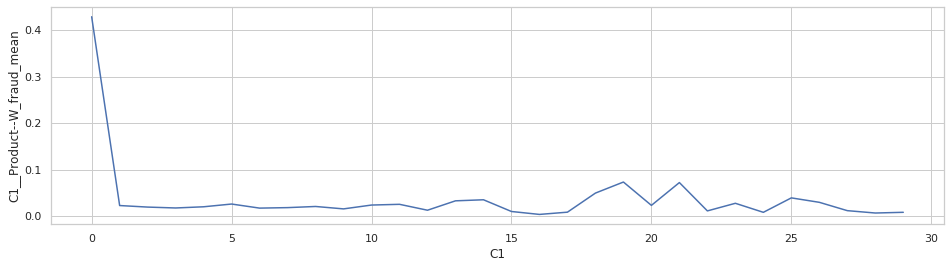

C1__Product--W_cnt


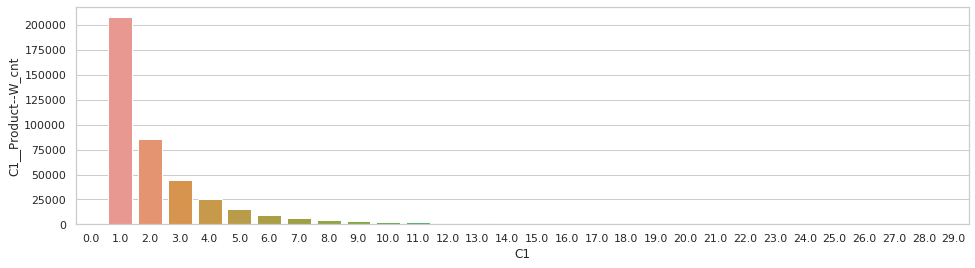

C1__Product--C_fraud_mean


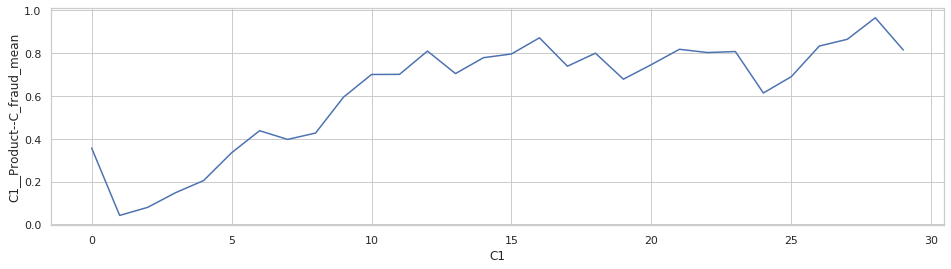

C1__Product--C_cnt


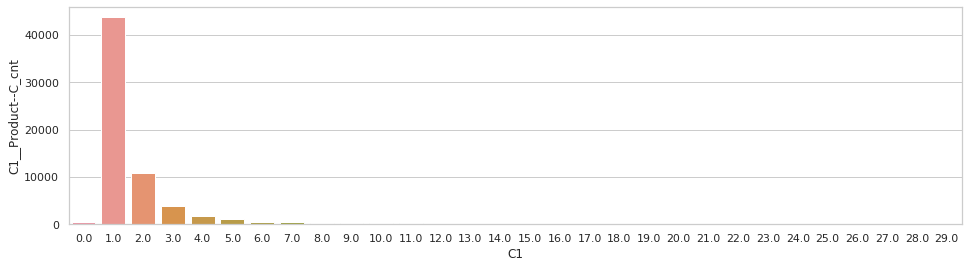

C1__Product--S_fraud_mean


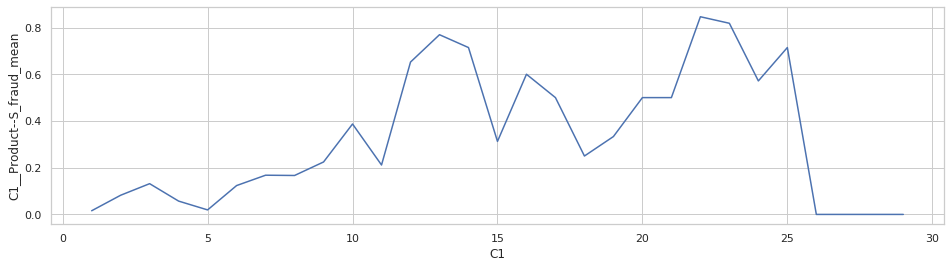

C1__Product--S_cnt


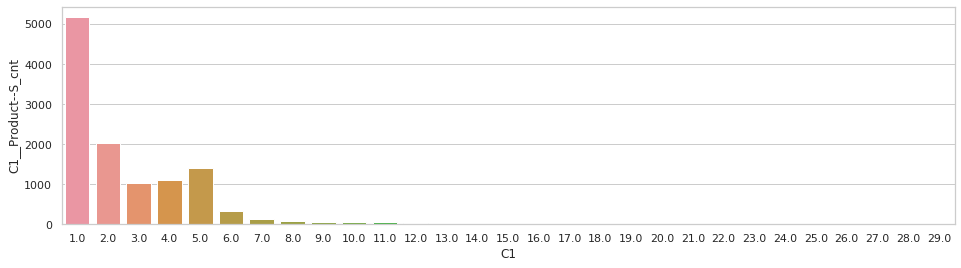

C1__Product--H_fraud_mean


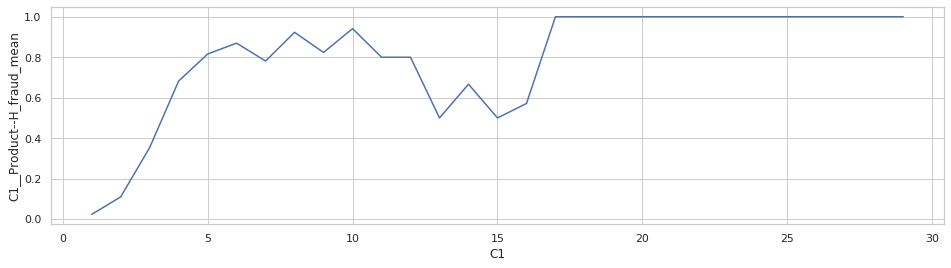

C1__Product--H_cnt


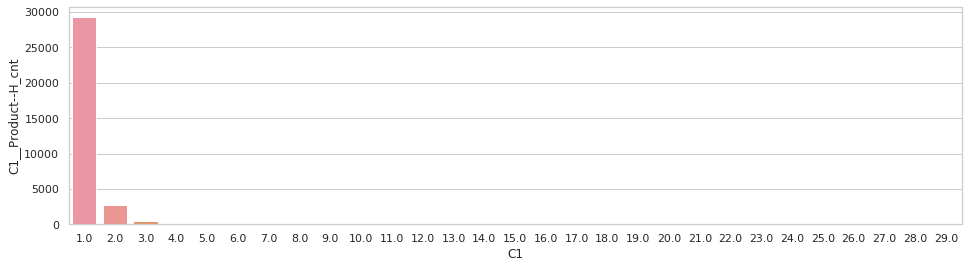

C1__Product--R_fraud_mean


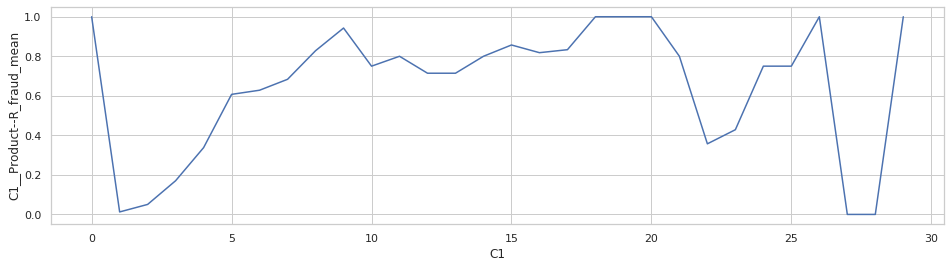

C1__Product--R_cnt


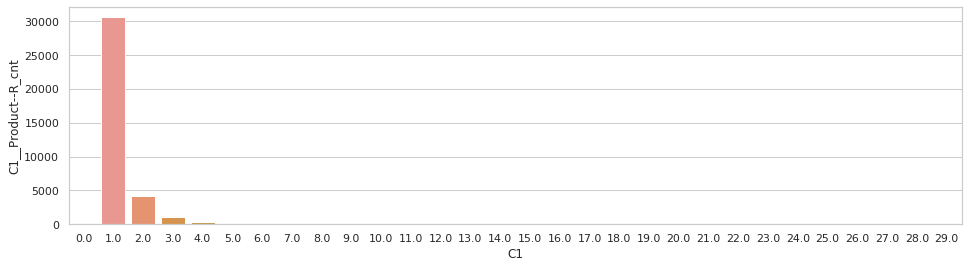

C2__Product--W_fraud_mean


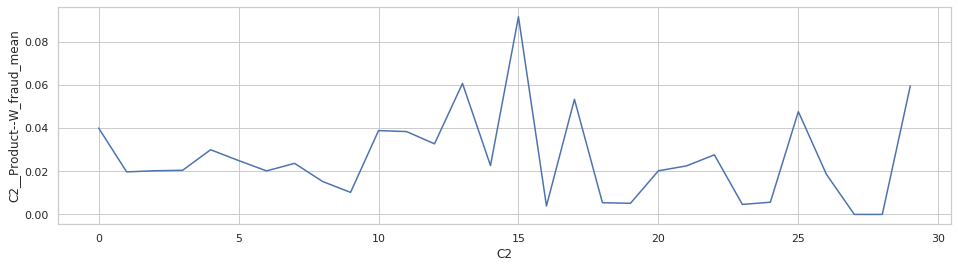

C2__Product--W_cnt


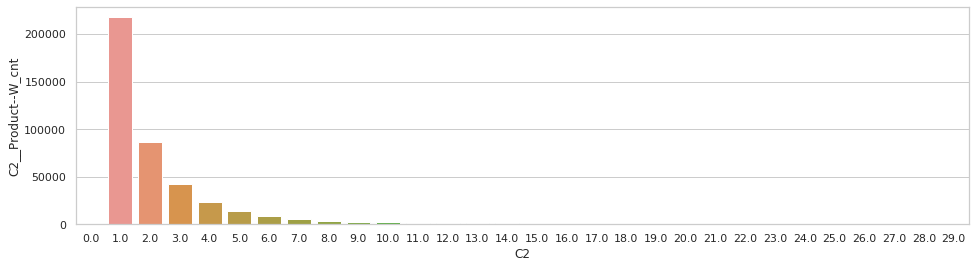

C2__Product--C_fraud_mean


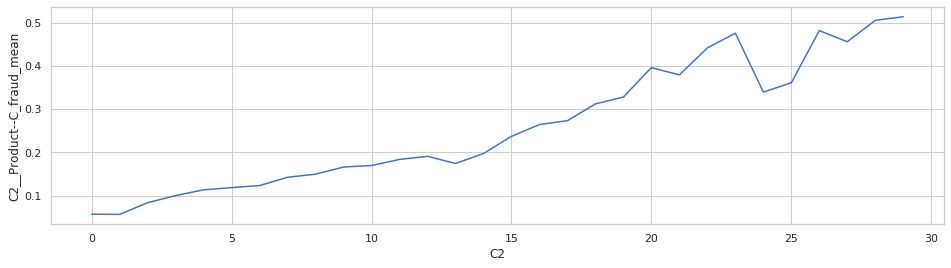

C2__Product--C_cnt


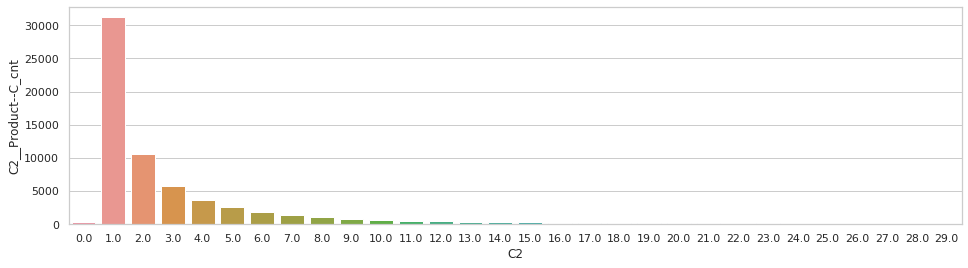

C2__Product--S_fraud_mean


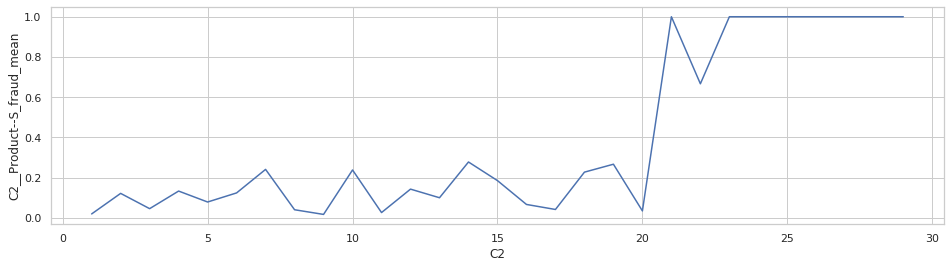

C2__Product--S_cnt


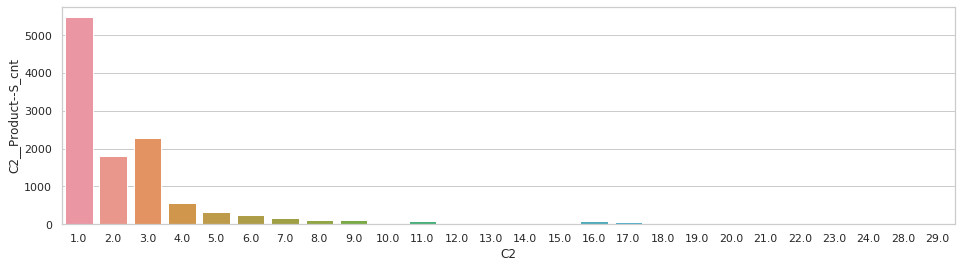

C2__Product--H_fraud_mean


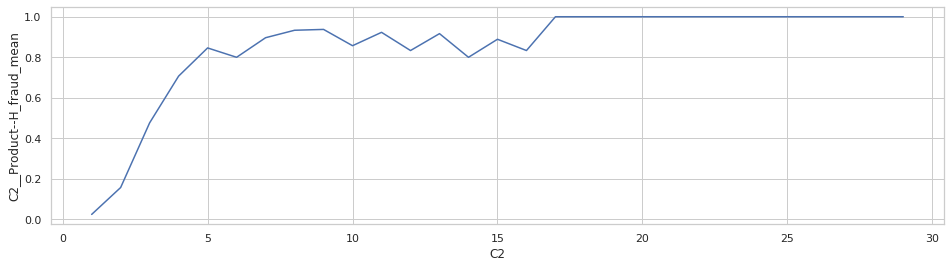

C2__Product--H_cnt


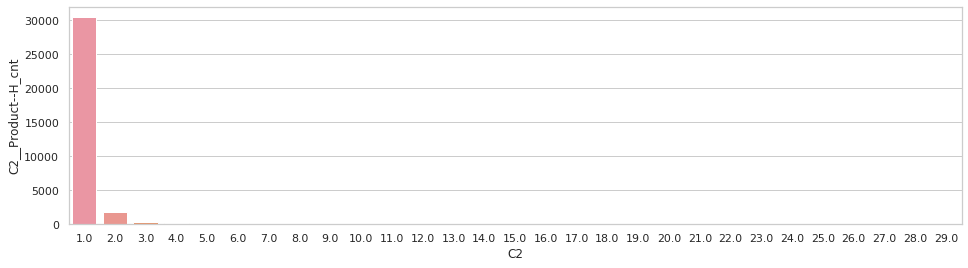

C2__Product--R_fraud_mean


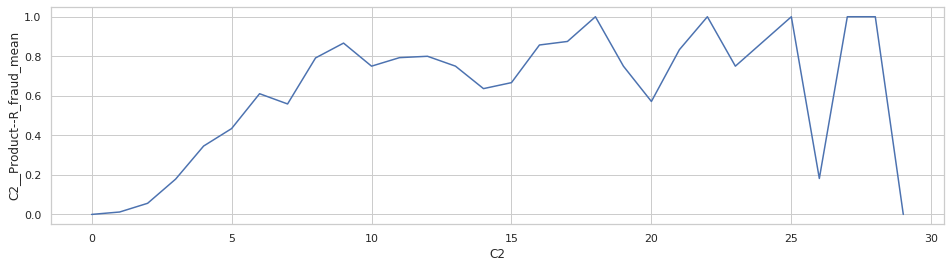

C2__Product--R_cnt


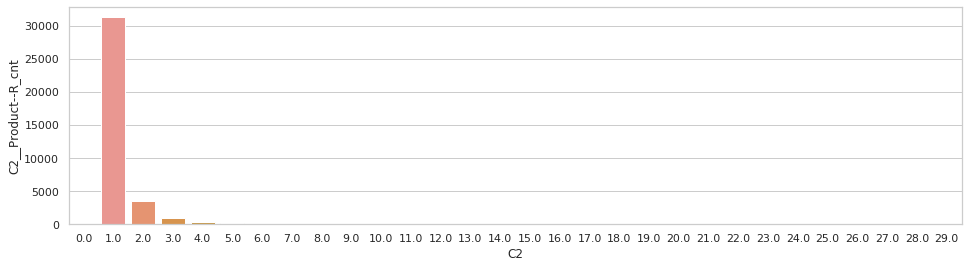

C4__Product--W_fraud_mean


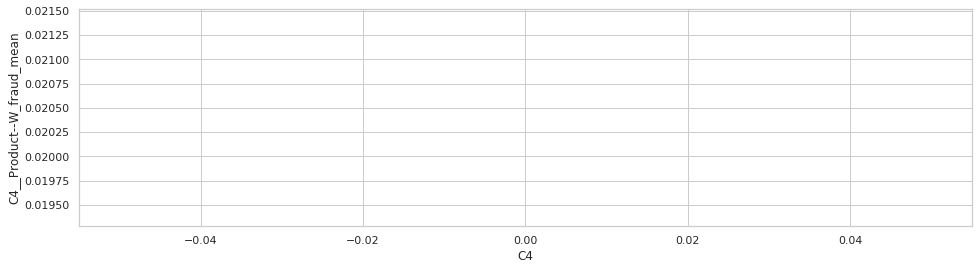

C4__Product--W_cnt


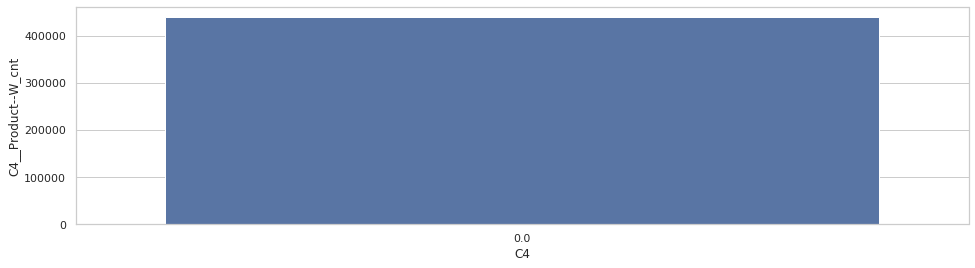

C4__Product--C_fraud_mean


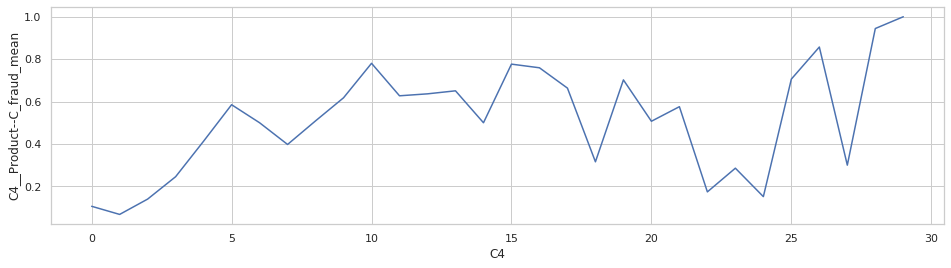

C4__Product--C_cnt


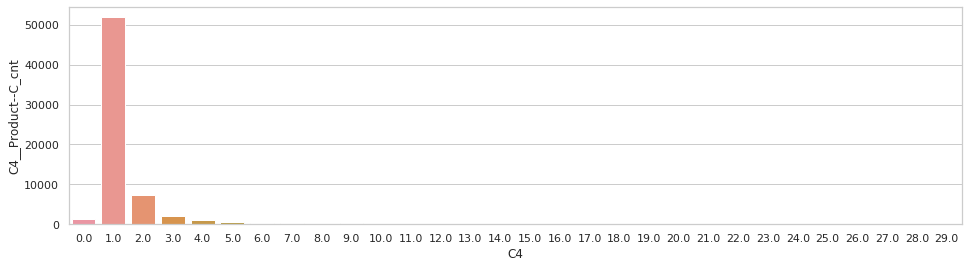

C4__Product--S_fraud_mean


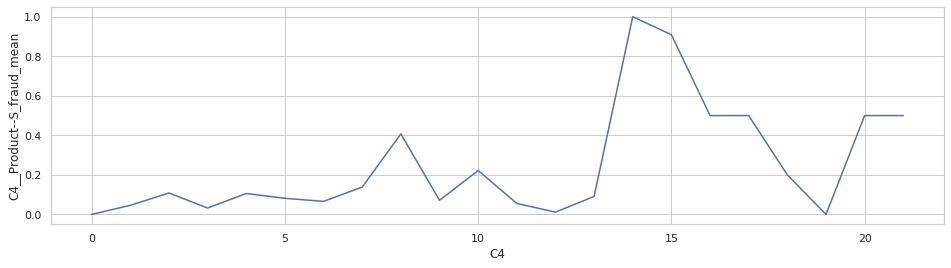

C4__Product--S_cnt


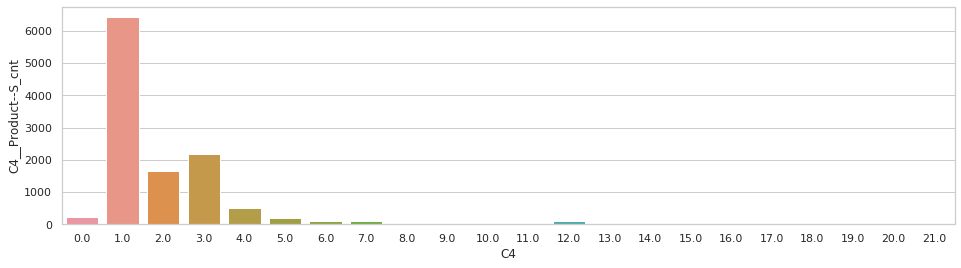

C4__Product--H_fraud_mean


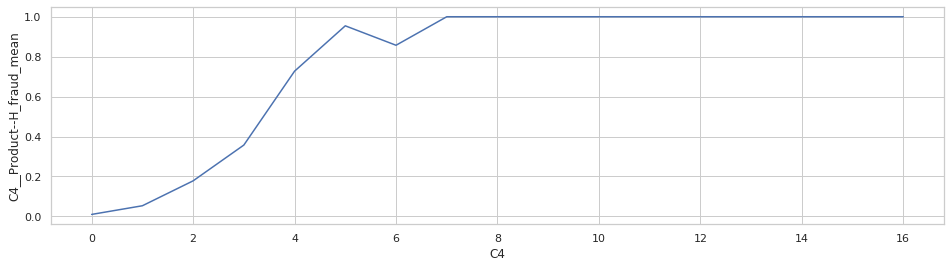

C4__Product--H_cnt


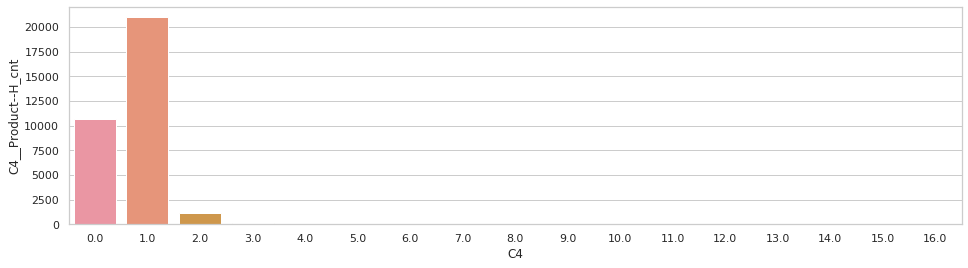

C4__Product--R_fraud_mean


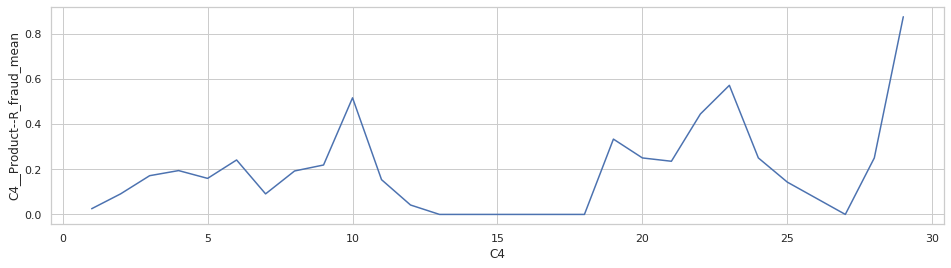

C4__Product--R_cnt


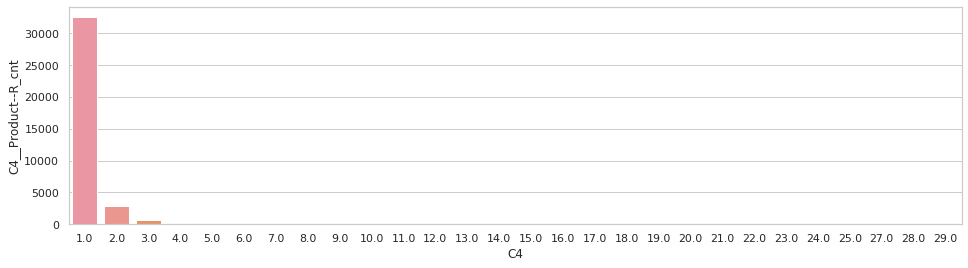

C5__Product--W_fraud_mean


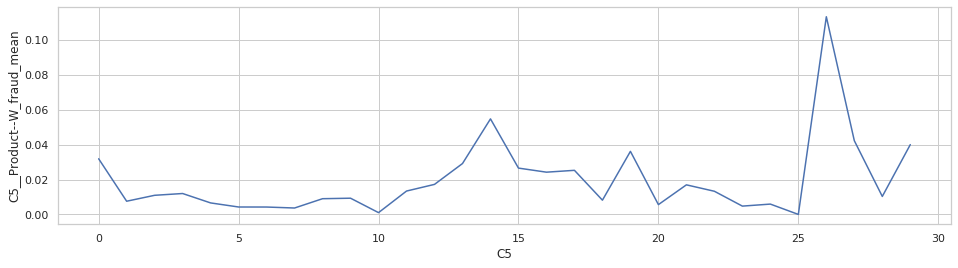

C5__Product--W_cnt


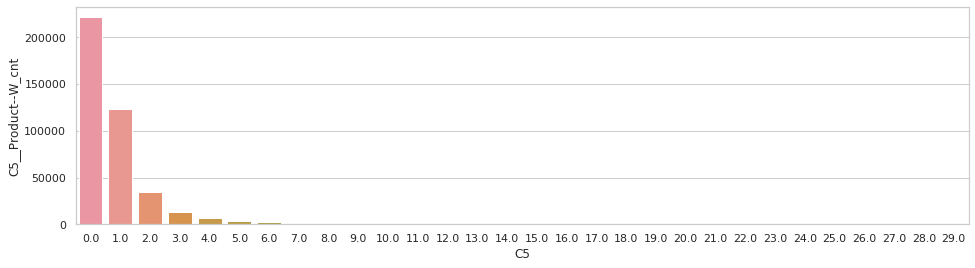

C5__Product--C_fraud_mean


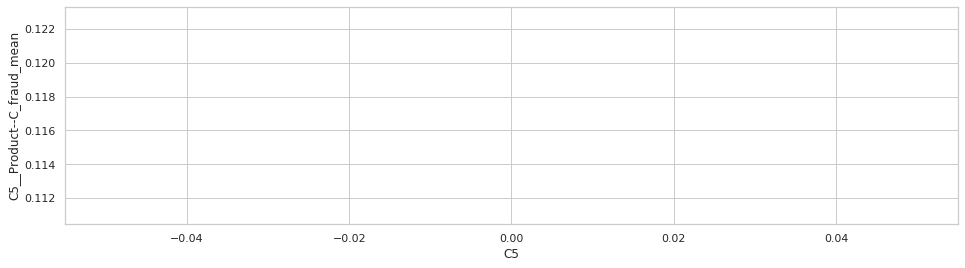

C5__Product--C_cnt


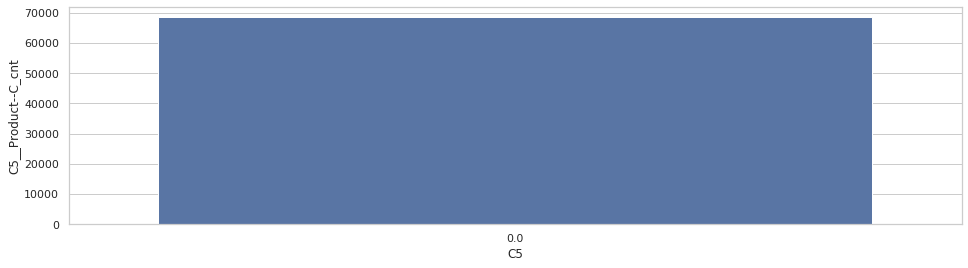

C5__Product--S_fraud_mean


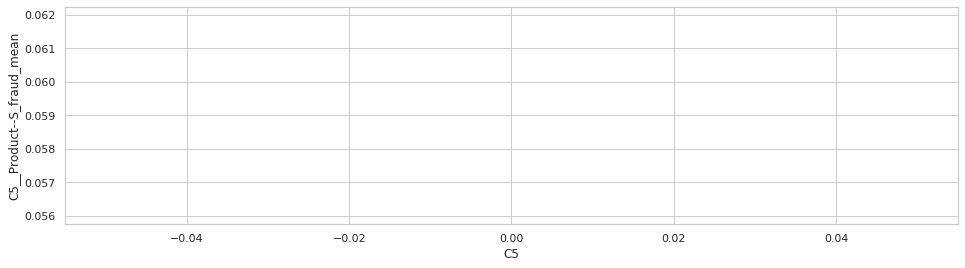

C5__Product--S_cnt


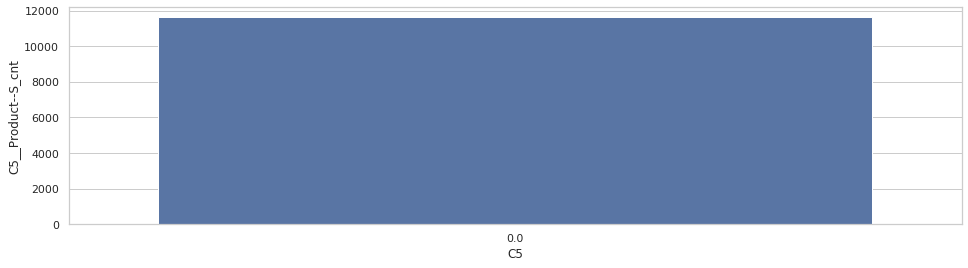

C5__Product--H_fraud_mean


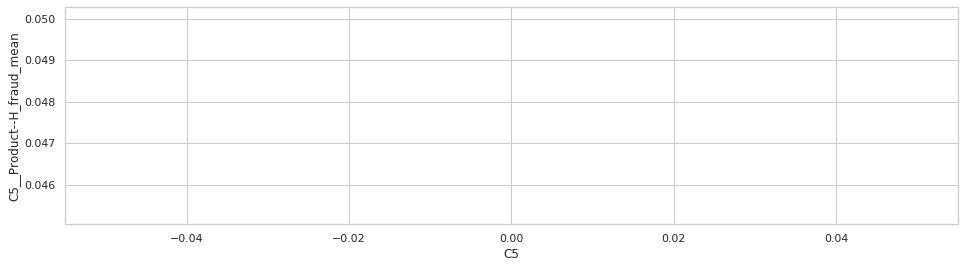

C5__Product--H_cnt


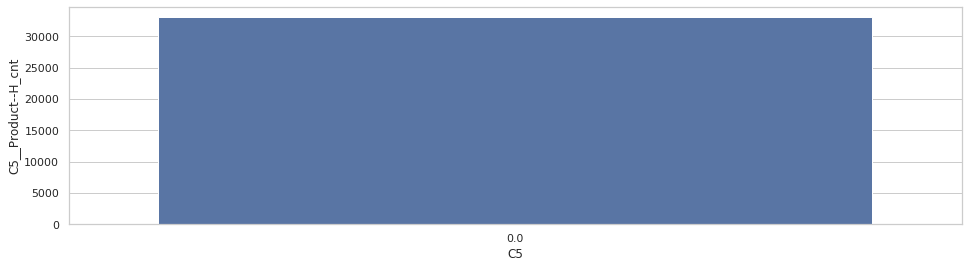

C5__Product--R_fraud_mean


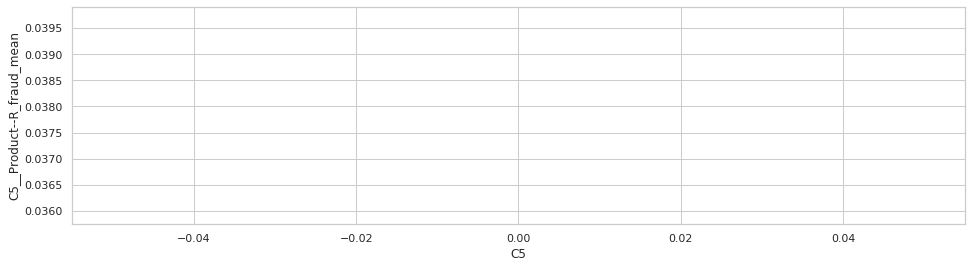

C5__Product--R_cnt


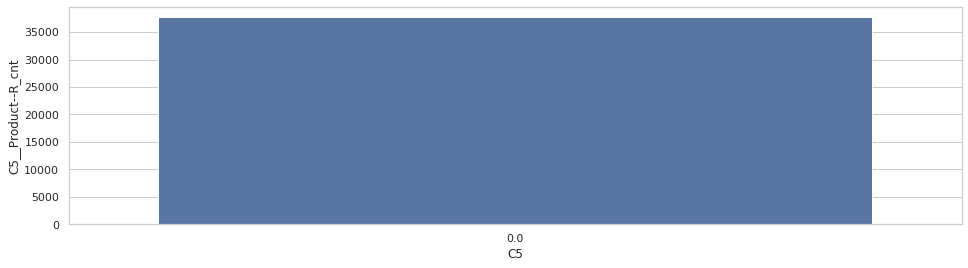

C6__Product--W_fraud_mean


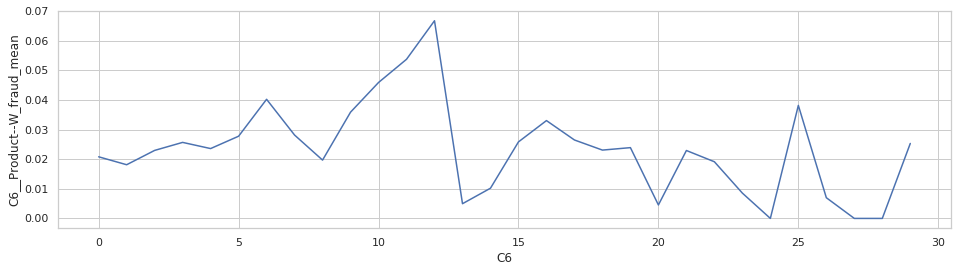

C6__Product--W_cnt


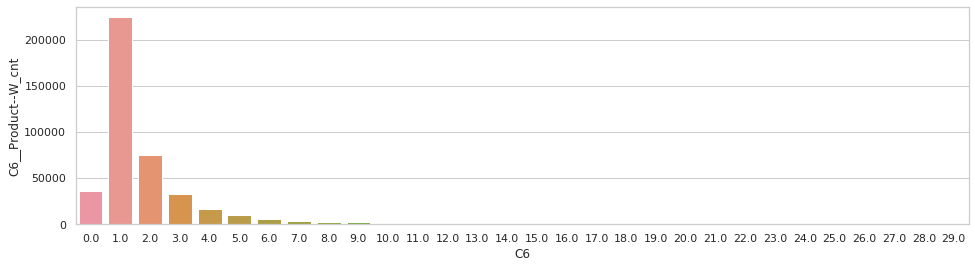

C6__Product--C_fraud_mean


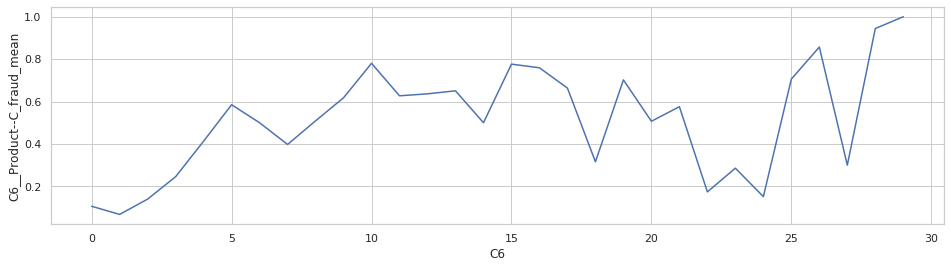

C6__Product--C_cnt


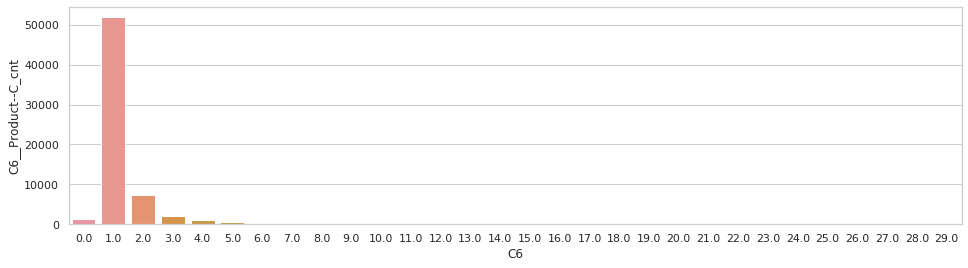

C6__Product--S_fraud_mean


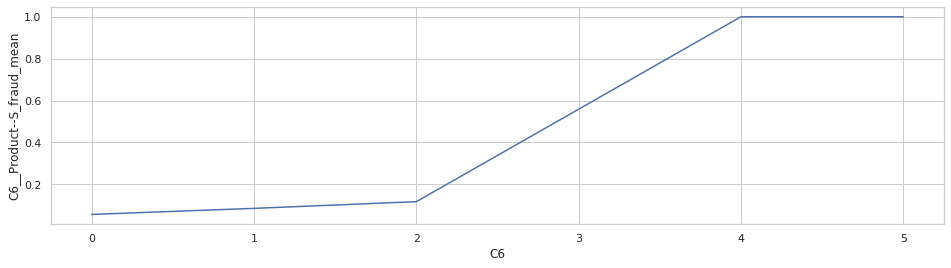

C6__Product--S_cnt


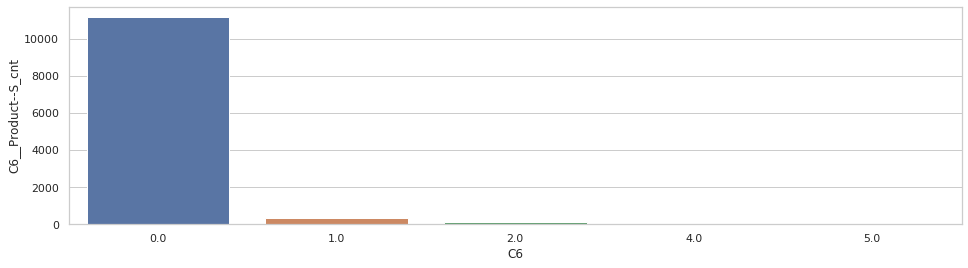

C6__Product--H_fraud_mean


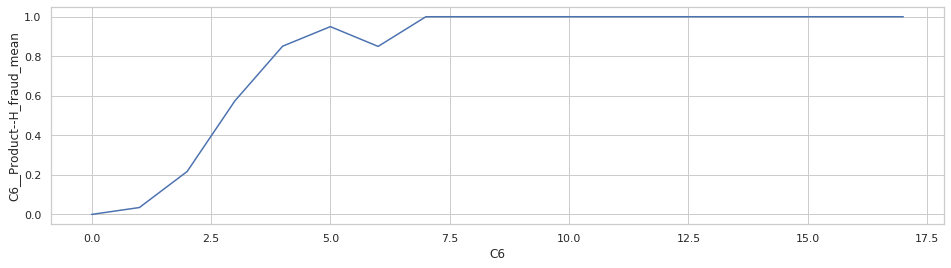

C6__Product--H_cnt


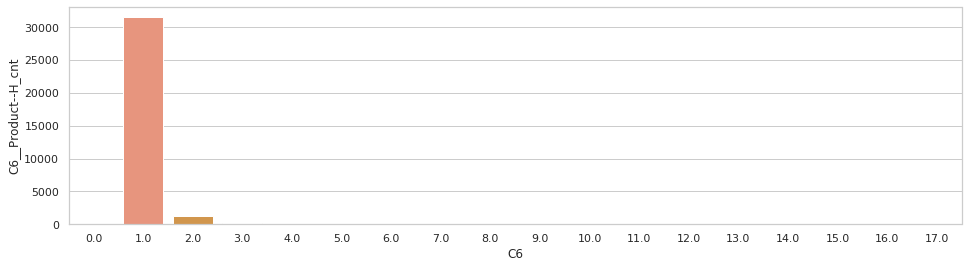

C6__Product--R_fraud_mean


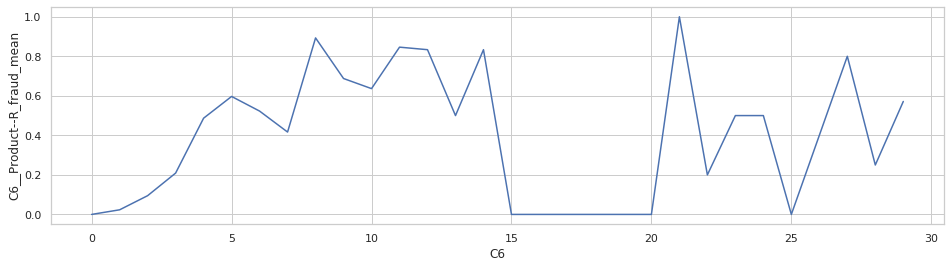

C6__Product--R_cnt


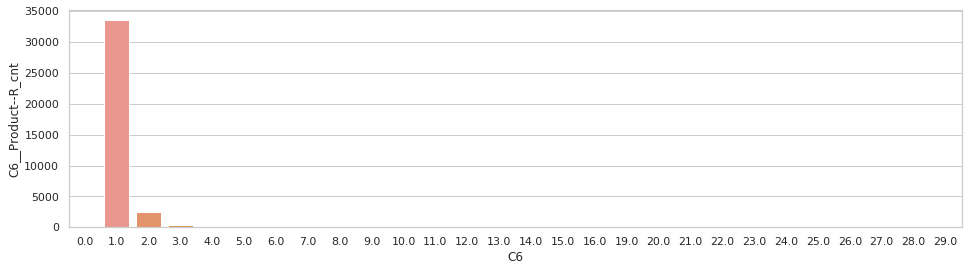

C7__Product--W_fraud_mean


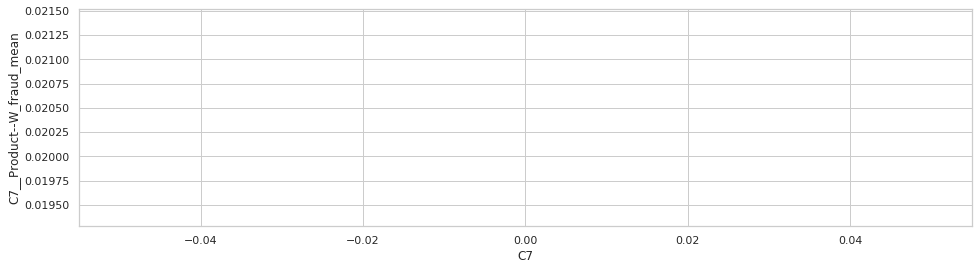

C7__Product--W_cnt


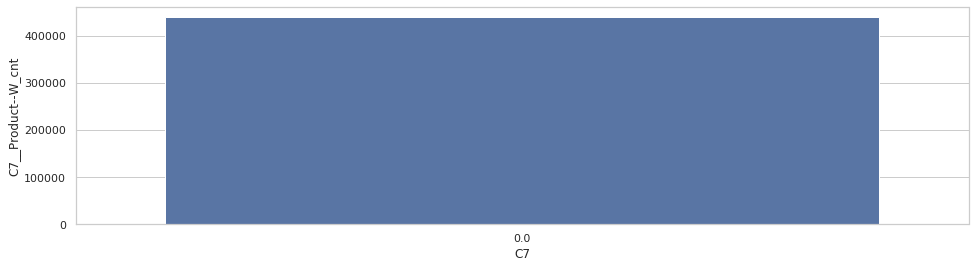

C7__Product--C_fraud_mean


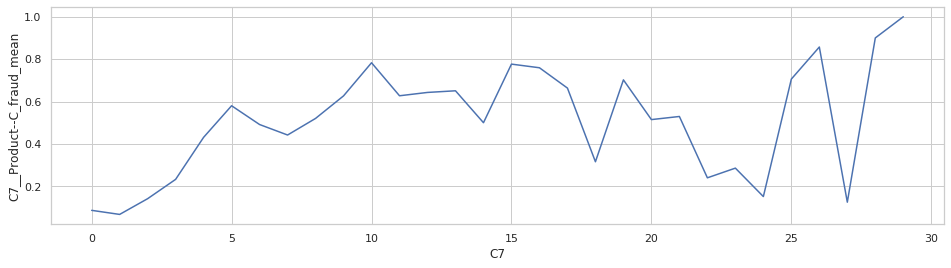

C7__Product--C_cnt


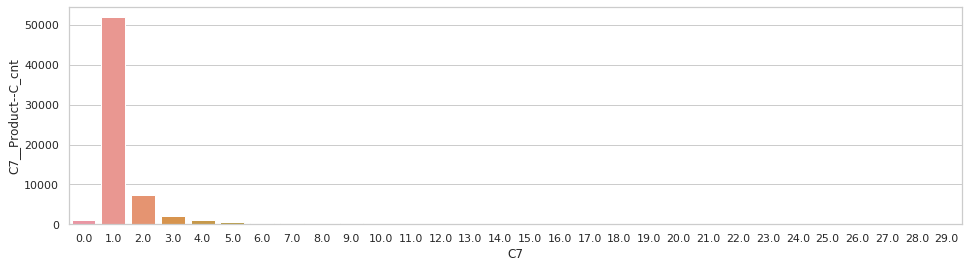

C7__Product--S_fraud_mean


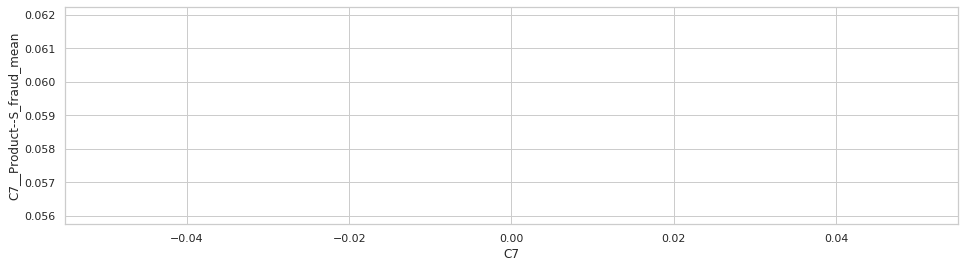

C7__Product--S_cnt


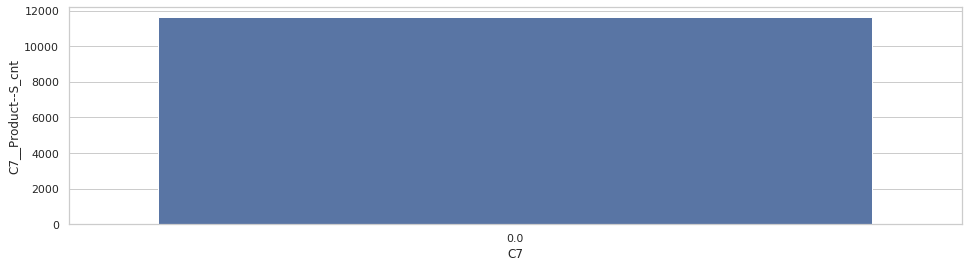

C7__Product--H_fraud_mean


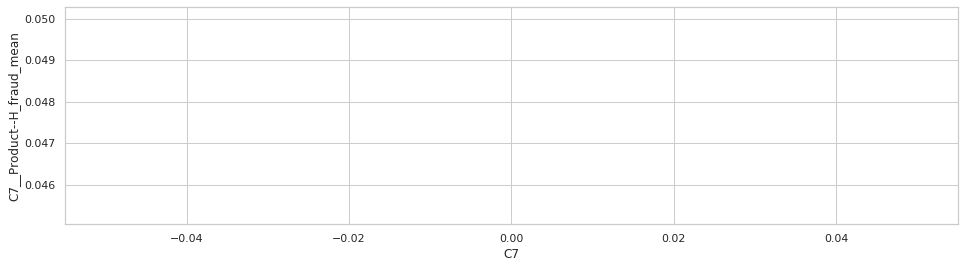

C7__Product--H_cnt


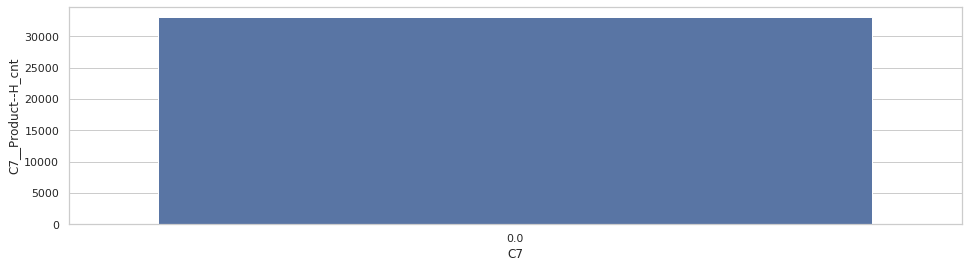

C7__Product--R_fraud_mean


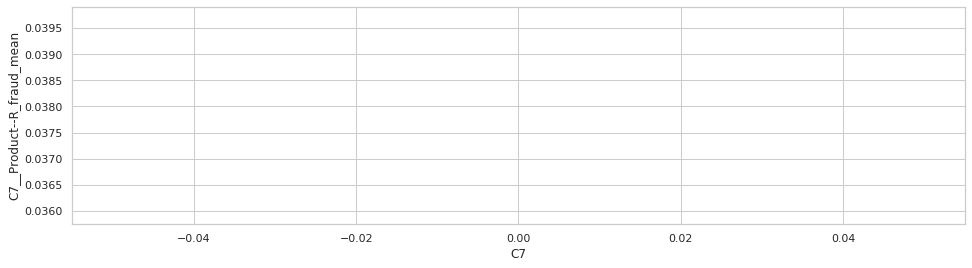

C7__Product--R_cnt


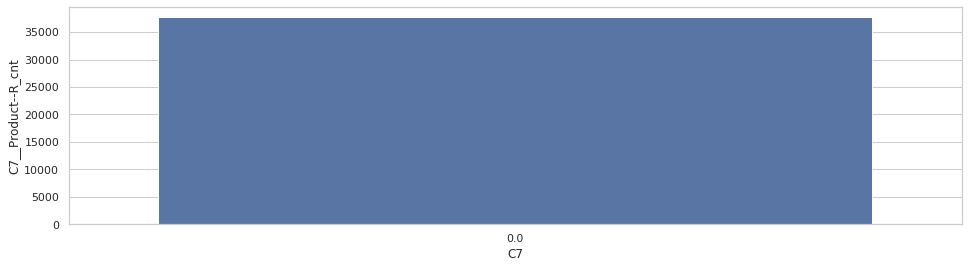

C8__Product--W_fraud_mean


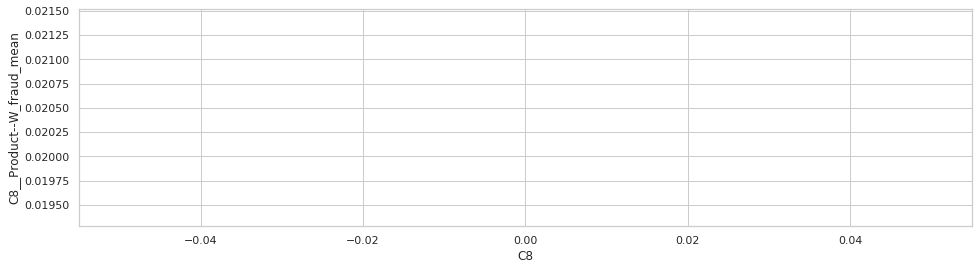

C8__Product--W_cnt


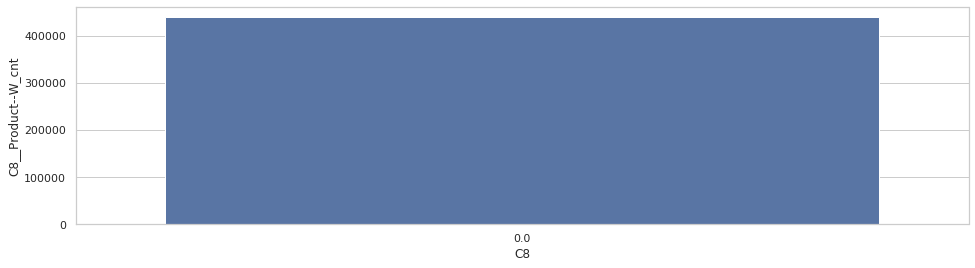

C8__Product--C_fraud_mean


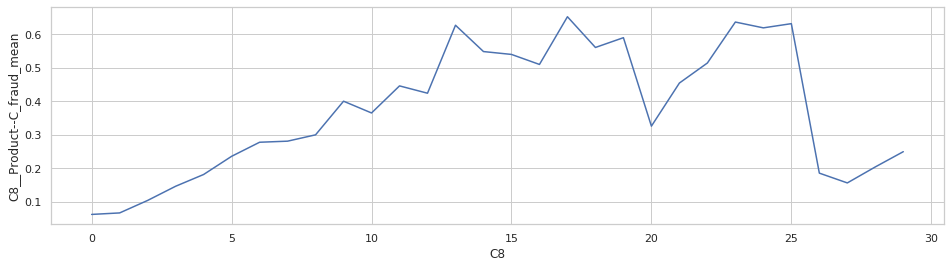

C8__Product--C_cnt


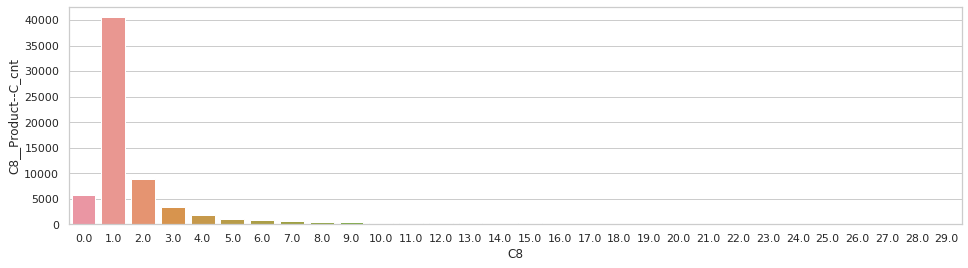

C8__Product--S_fraud_mean


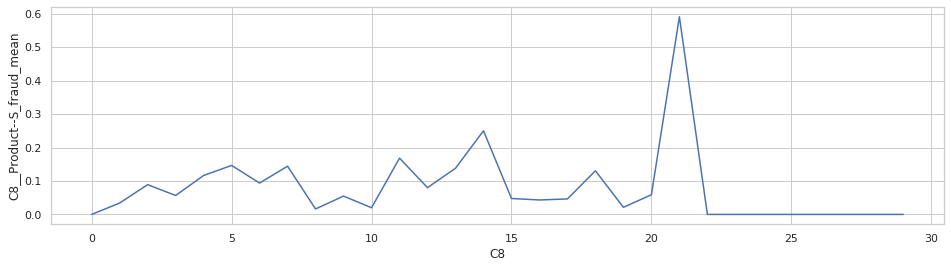

C8__Product--S_cnt


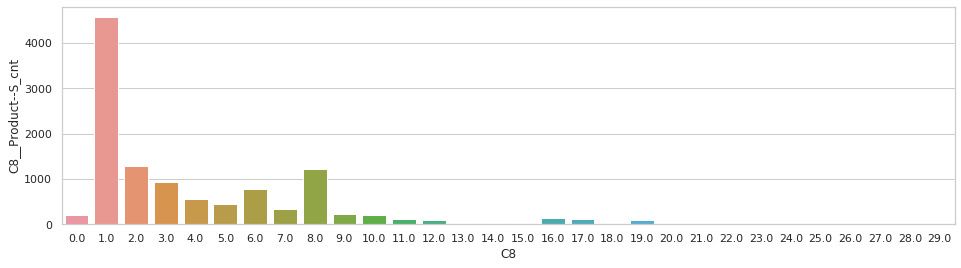

C8__Product--H_fraud_mean


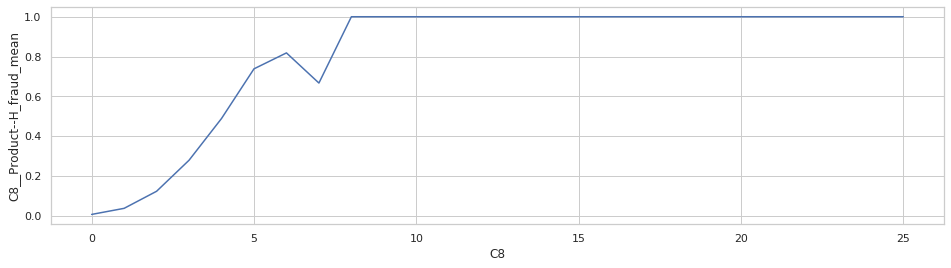

C8__Product--H_cnt


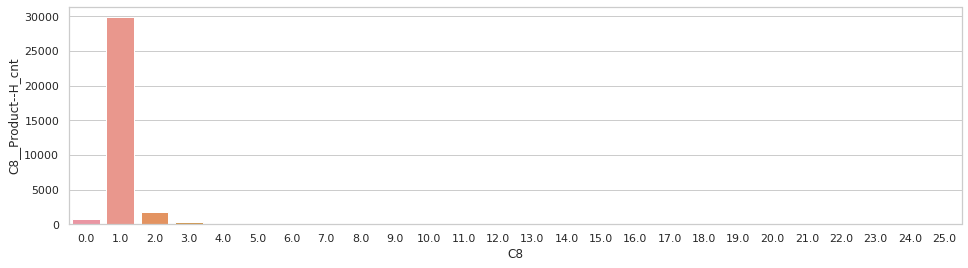

C8__Product--R_fraud_mean


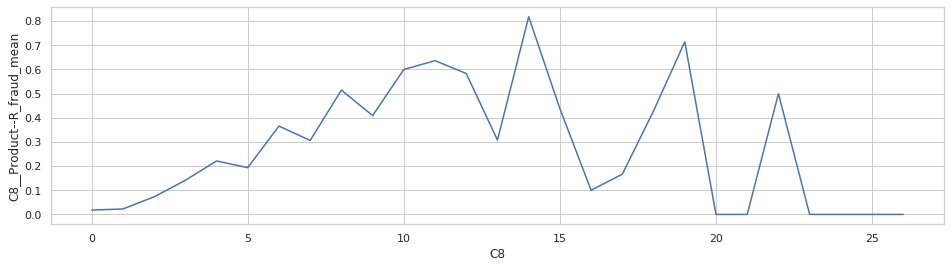

C8__Product--R_cnt


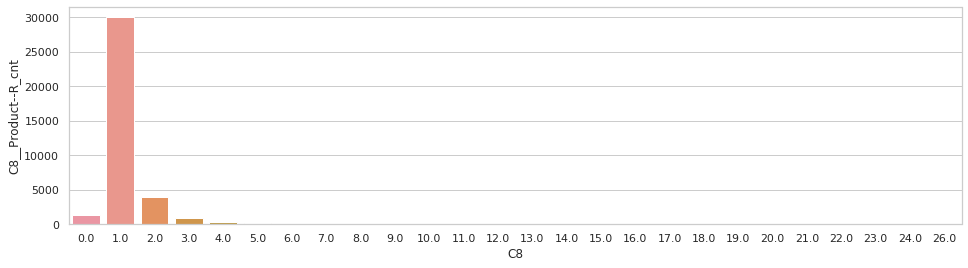

C9__Product--W_fraud_mean


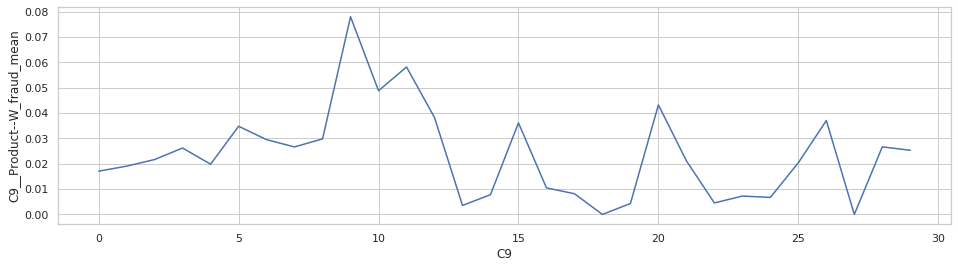

C9__Product--W_cnt


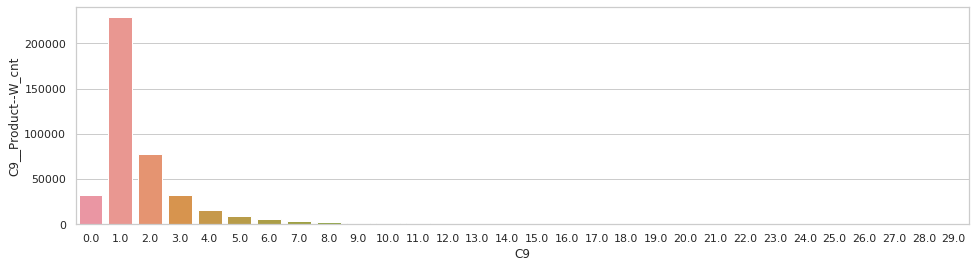

C9__Product--C_fraud_mean


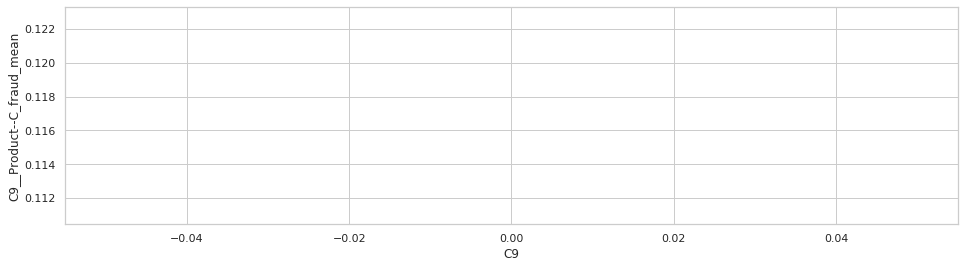

C9__Product--C_cnt


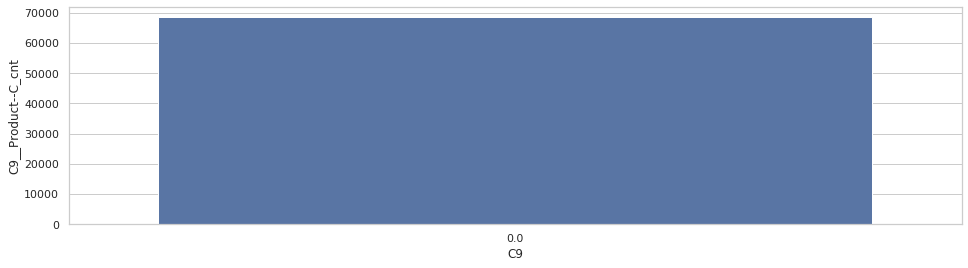

C9__Product--S_fraud_mean


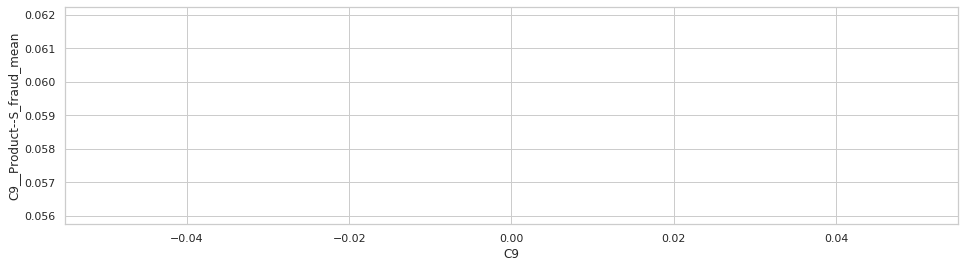

C9__Product--S_cnt


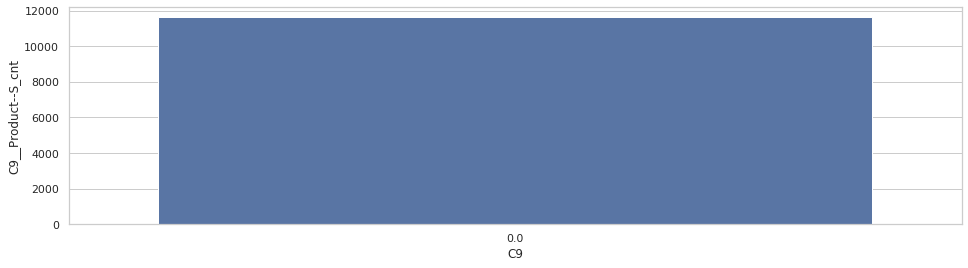

C9__Product--H_fraud_mean


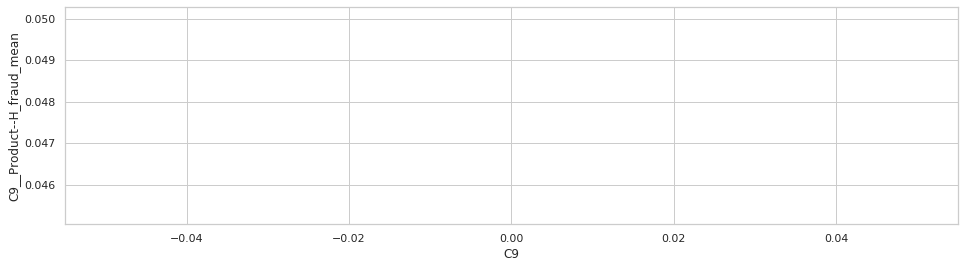

C9__Product--H_cnt


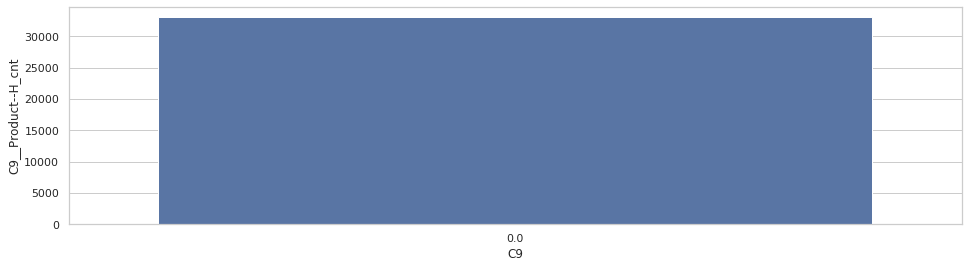

C9__Product--R_fraud_mean


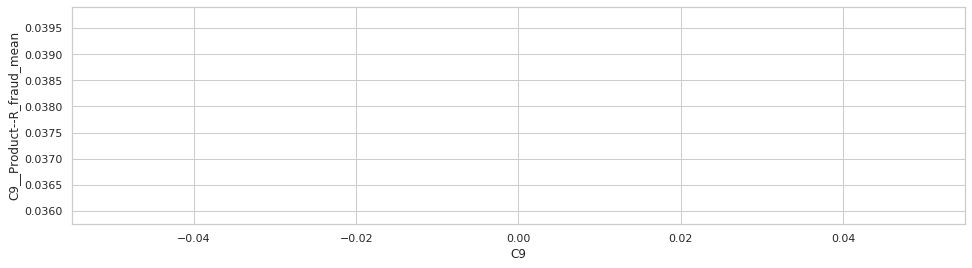

C9__Product--R_cnt


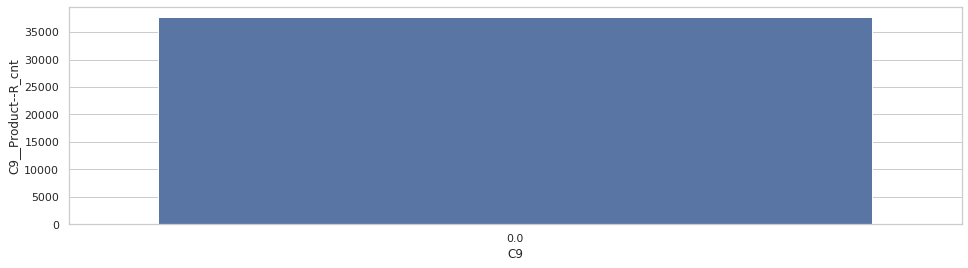

C10__Product--W_fraud_mean


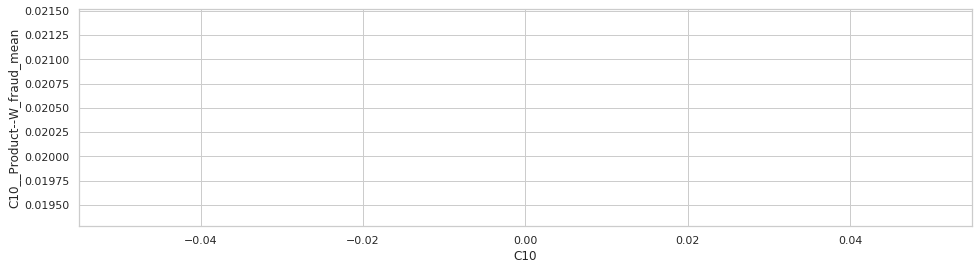

C10__Product--W_cnt


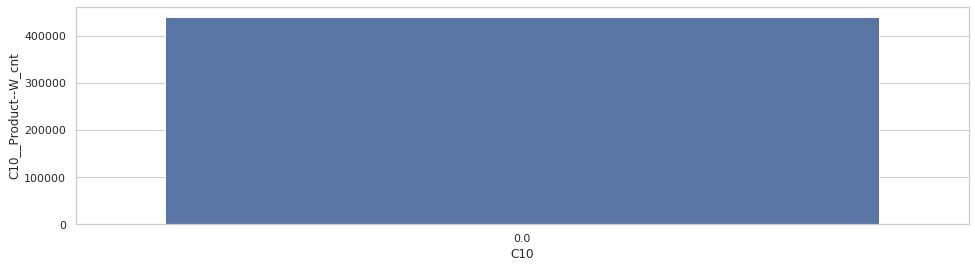

C10__Product--C_fraud_mean


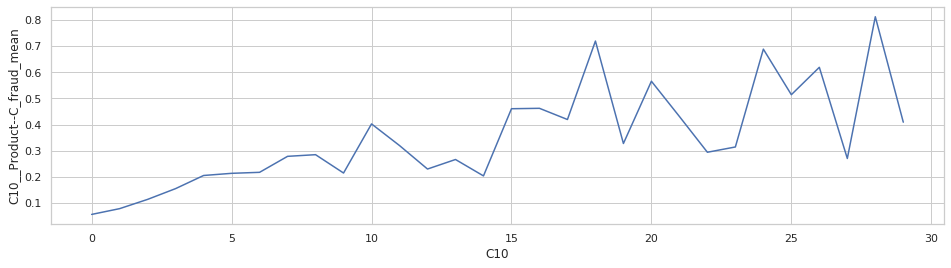

C10__Product--C_cnt


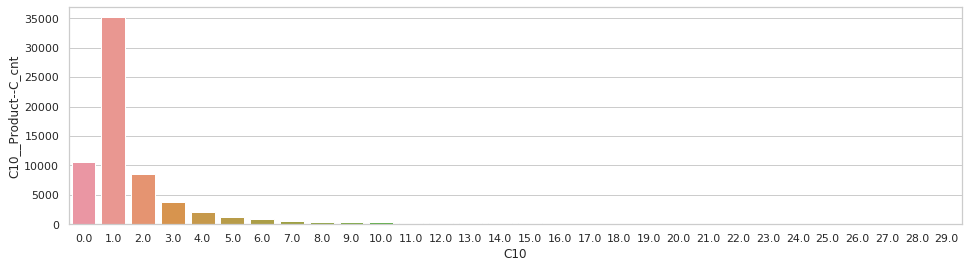

C10__Product--S_fraud_mean


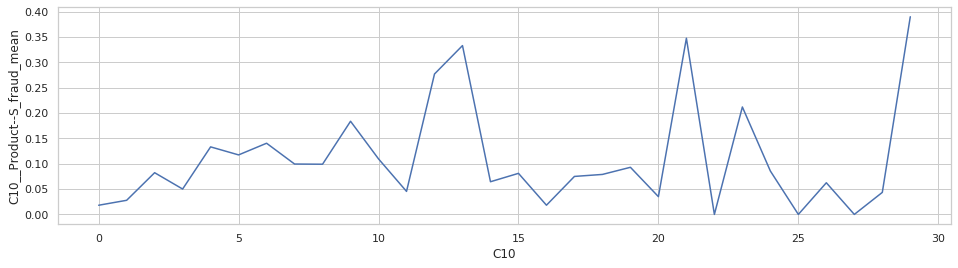

C10__Product--S_cnt


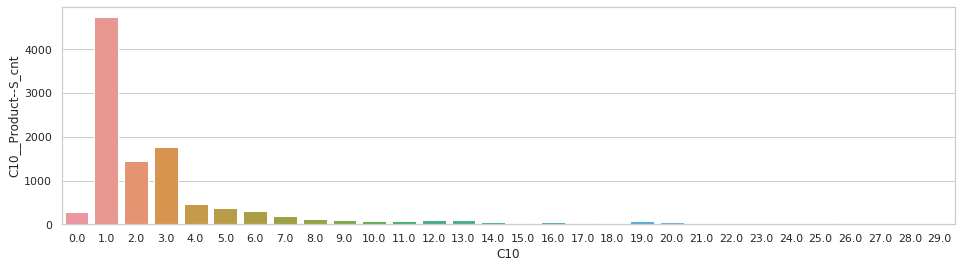

C10__Product--H_fraud_mean


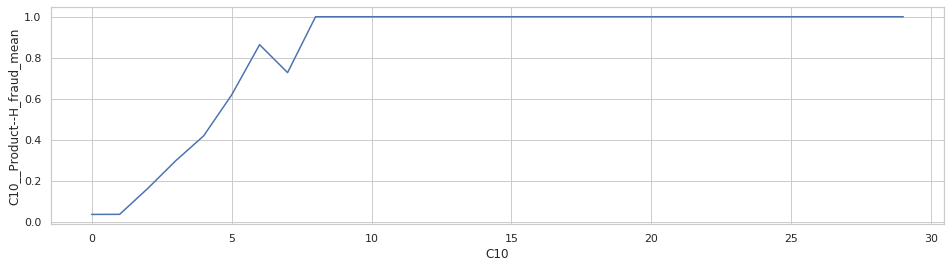

C10__Product--H_cnt


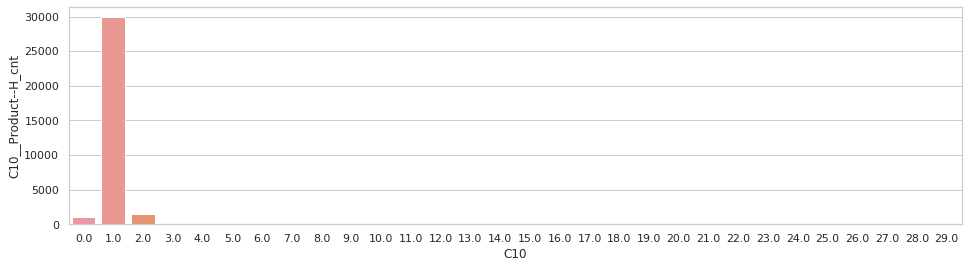

C10__Product--R_fraud_mean


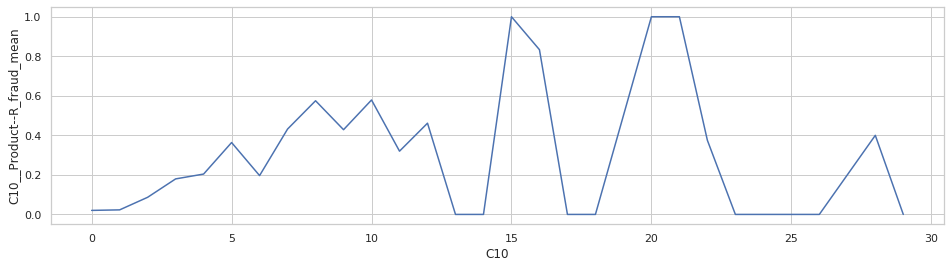

C10__Product--R_cnt


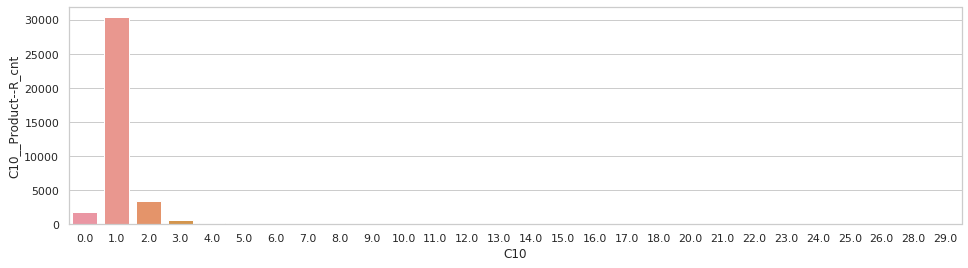

C11__Product--W_fraud_mean


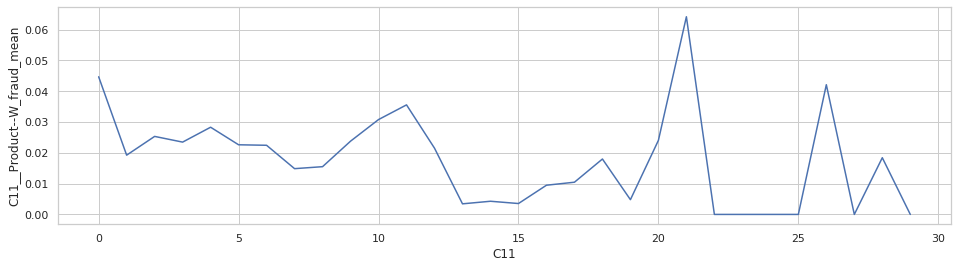

C11__Product--W_cnt


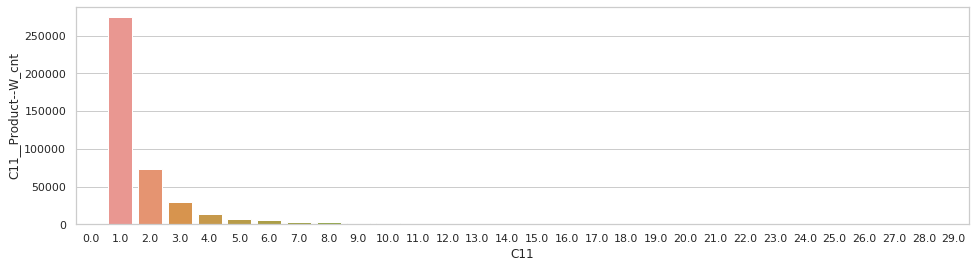

C11__Product--C_fraud_mean


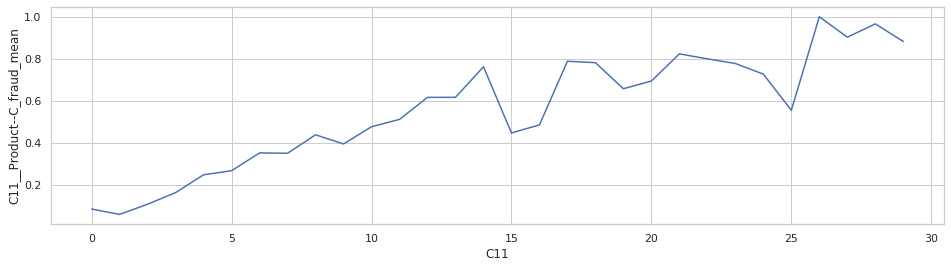

C11__Product--C_cnt


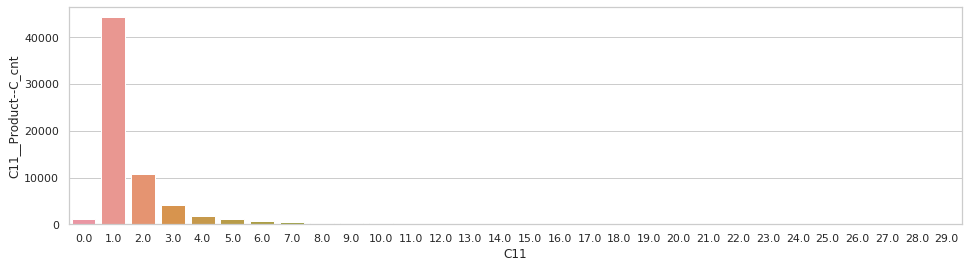

C11__Product--S_fraud_mean


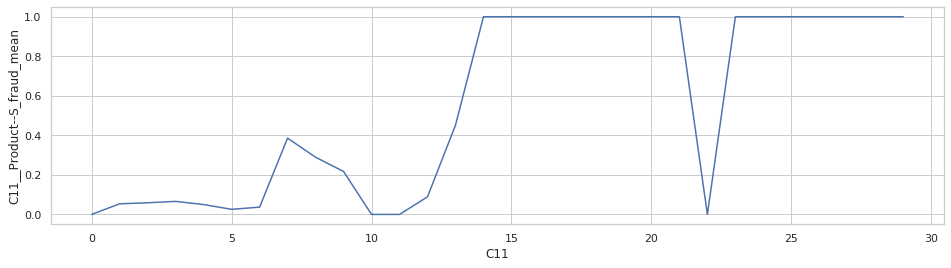

C11__Product--S_cnt


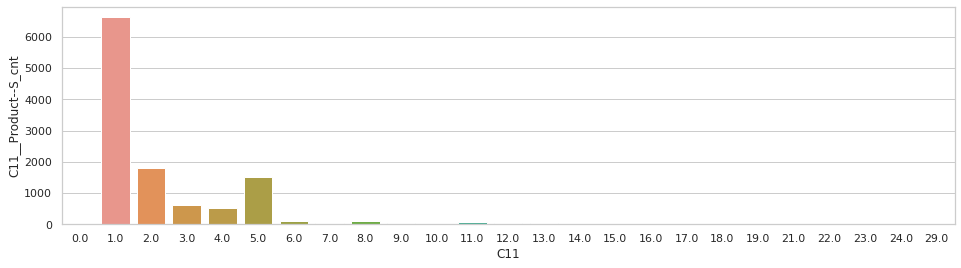

C11__Product--H_fraud_mean


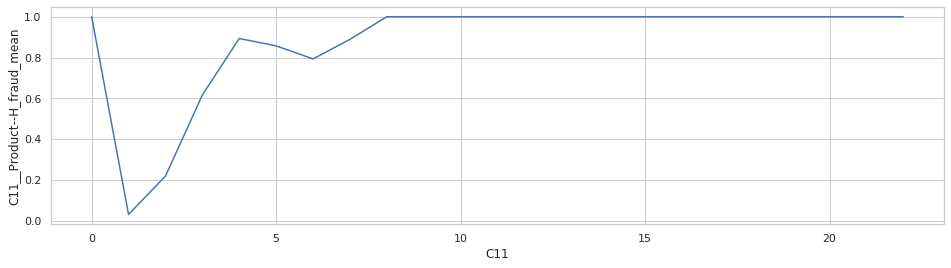

C11__Product--H_cnt


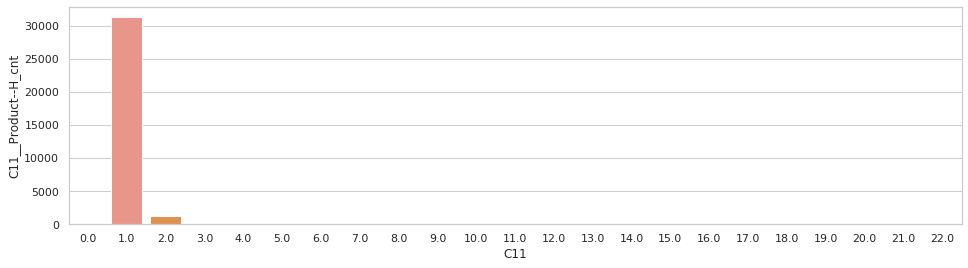

C11__Product--R_fraud_mean


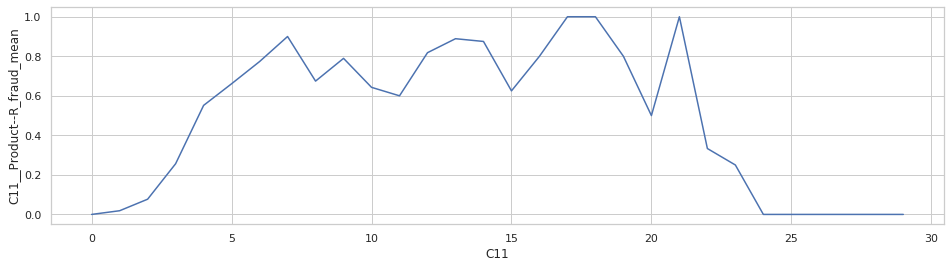

C11__Product--R_cnt


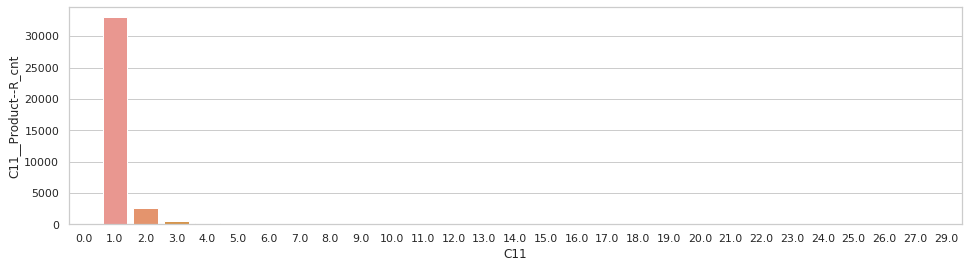

C12__Product--W_fraud_mean


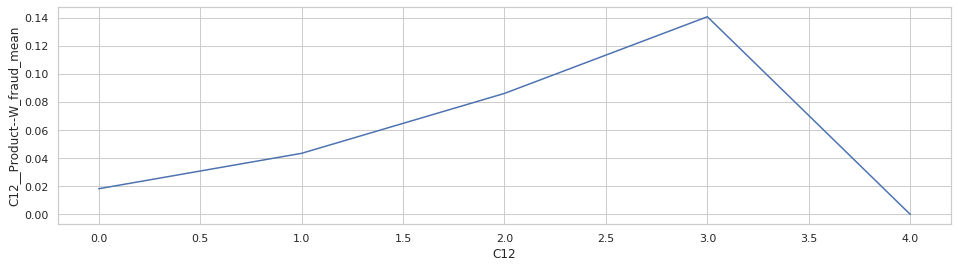

C12__Product--W_cnt


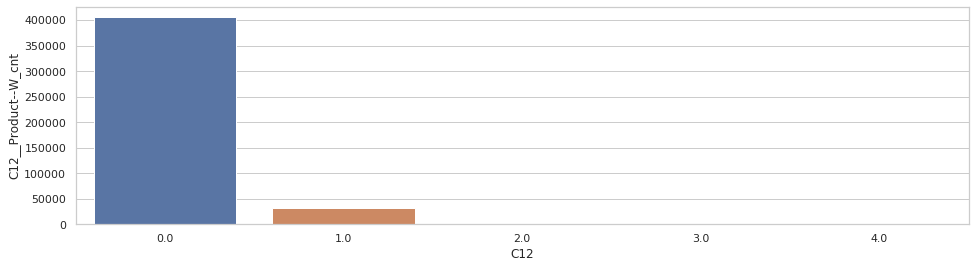

C12__Product--C_fraud_mean


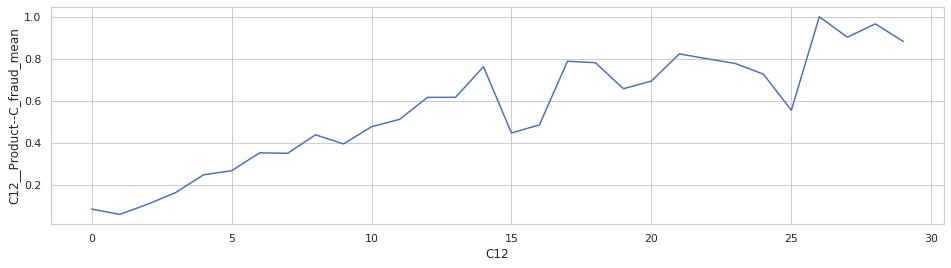

C12__Product--C_cnt


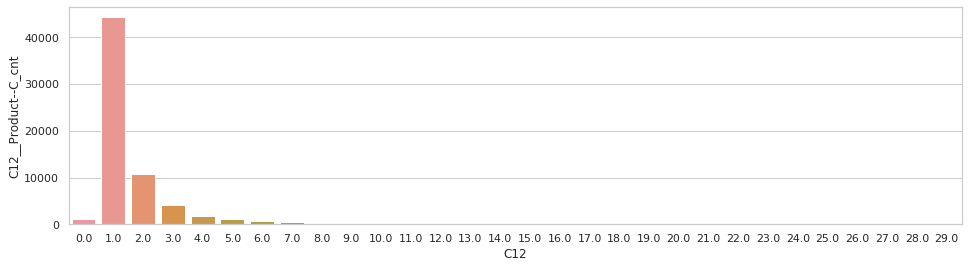

C12__Product--S_fraud_mean


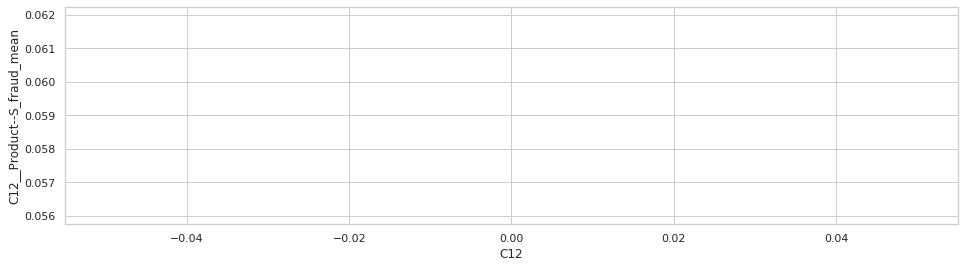

C12__Product--S_cnt


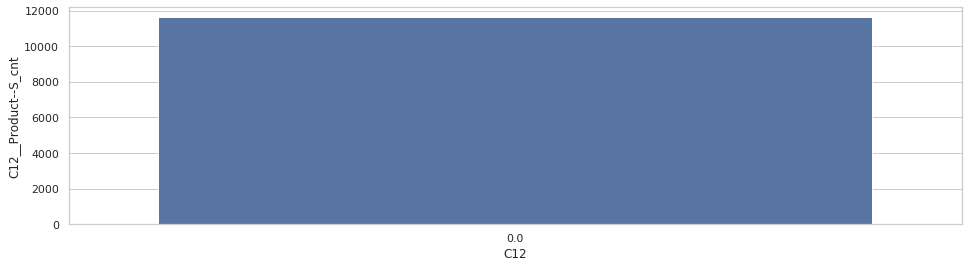

C12__Product--H_fraud_mean


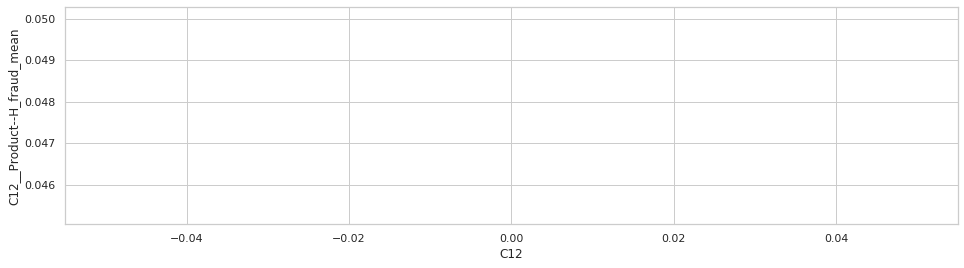

C12__Product--H_cnt


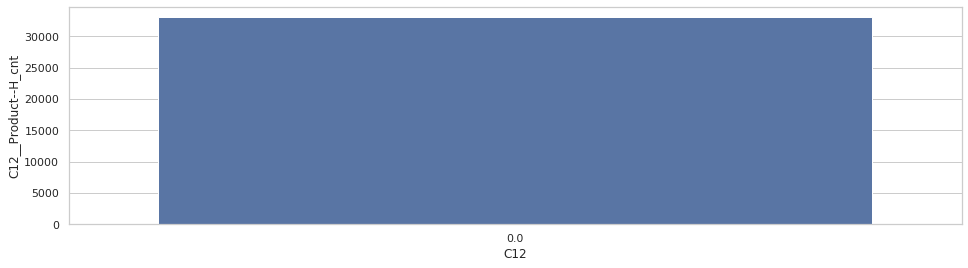

C12__Product--R_fraud_mean


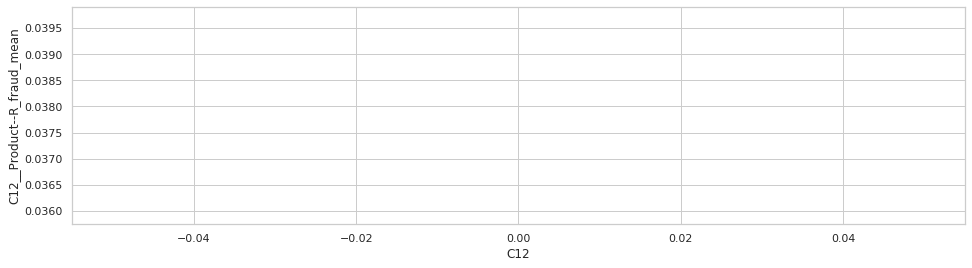

C12__Product--R_cnt


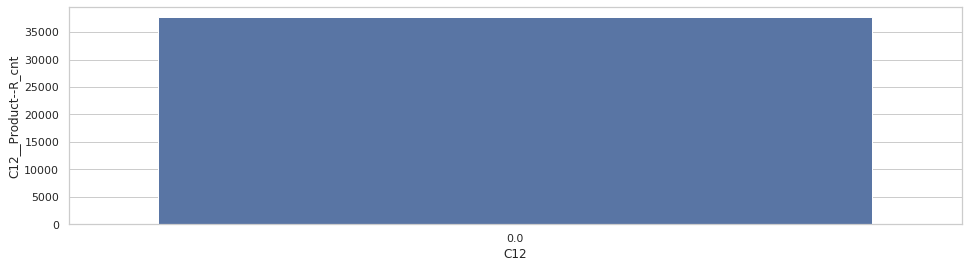

C13__Product--W_fraud_mean


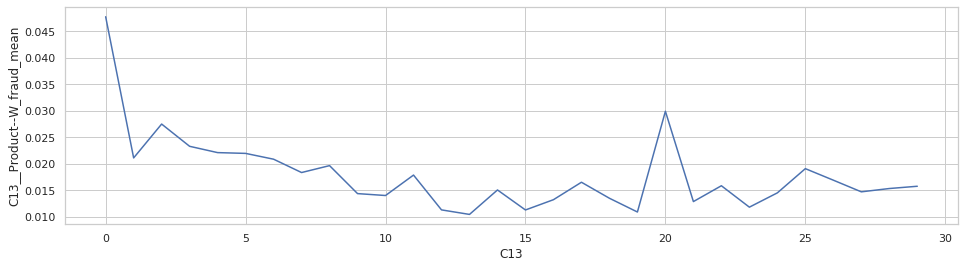

C13__Product--W_cnt


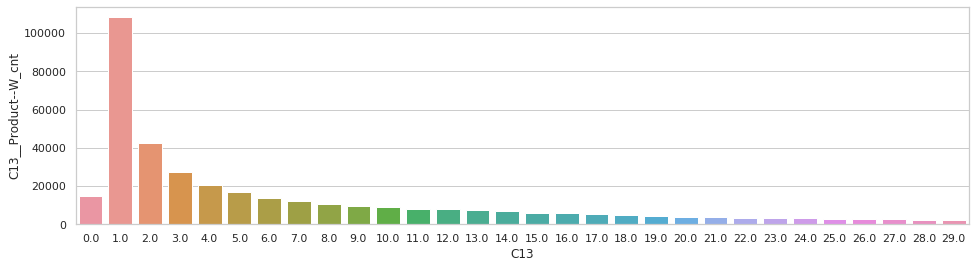

C13__Product--C_fraud_mean


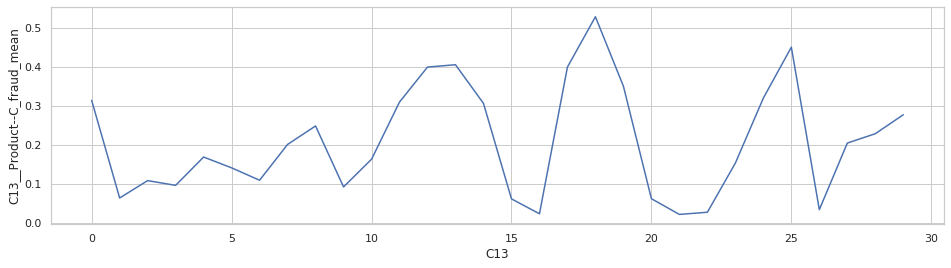

C13__Product--C_cnt


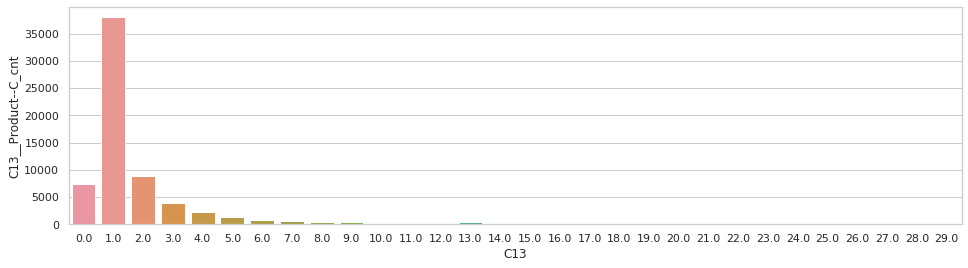

C13__Product--S_fraud_mean


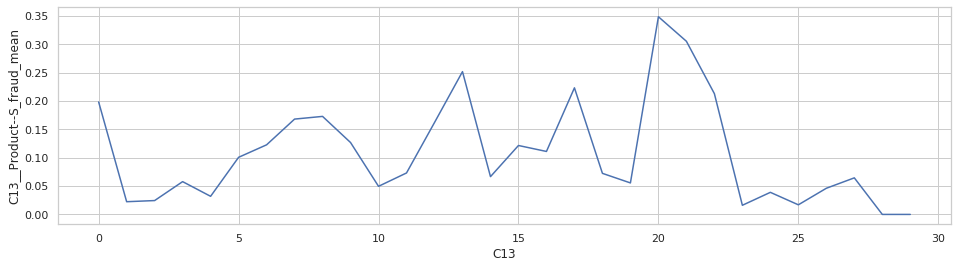

C13__Product--S_cnt


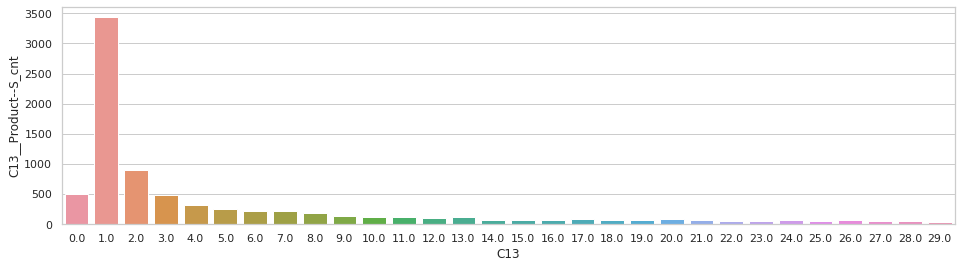

C13__Product--H_fraud_mean


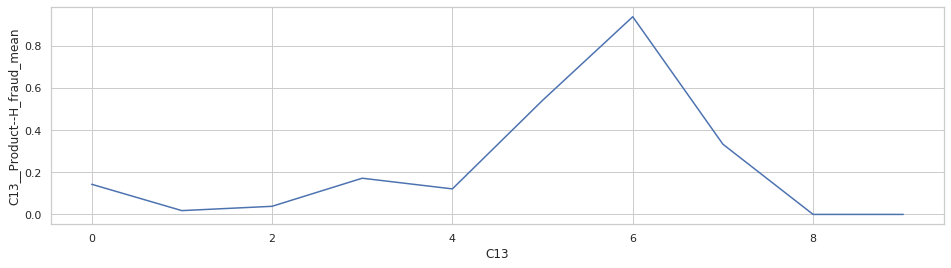

C13__Product--H_cnt


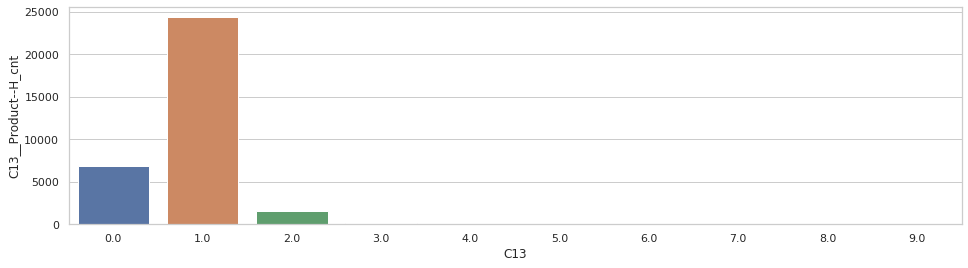

C13__Product--R_fraud_mean


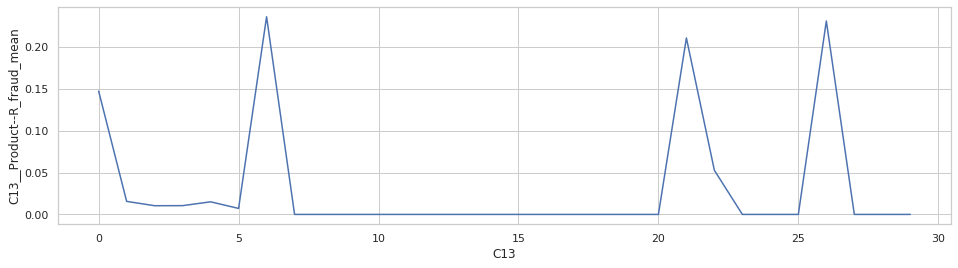

C13__Product--R_cnt


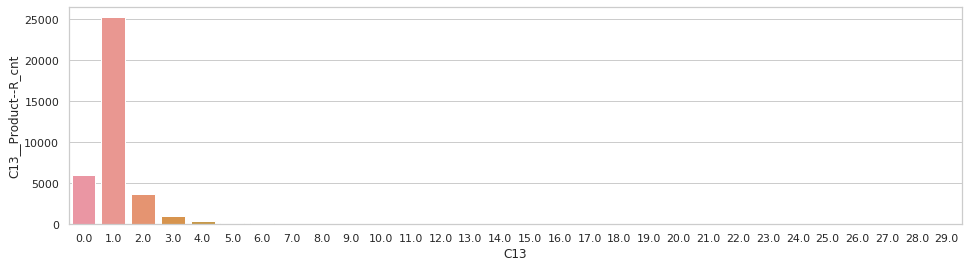

C14__Product--W_fraud_mean


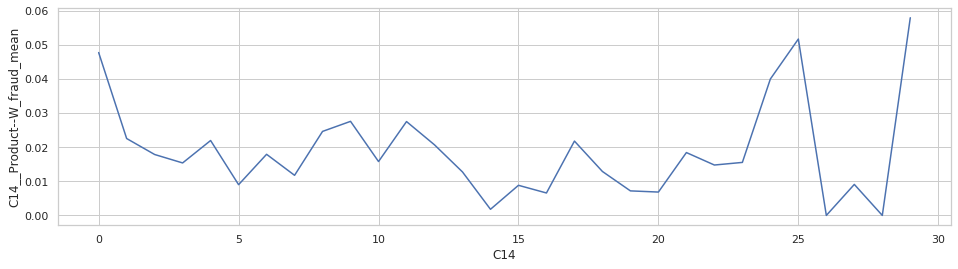

C14__Product--W_cnt


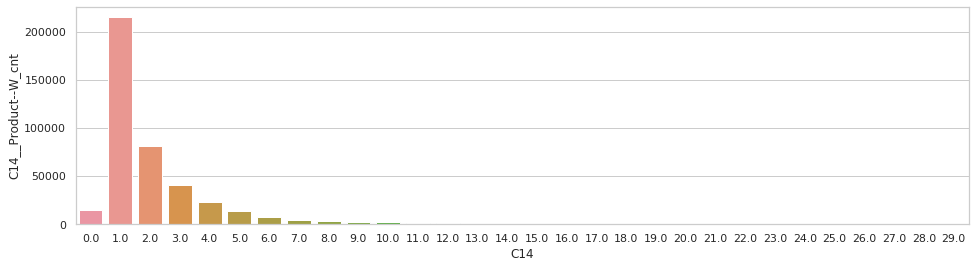

C14__Product--C_fraud_mean


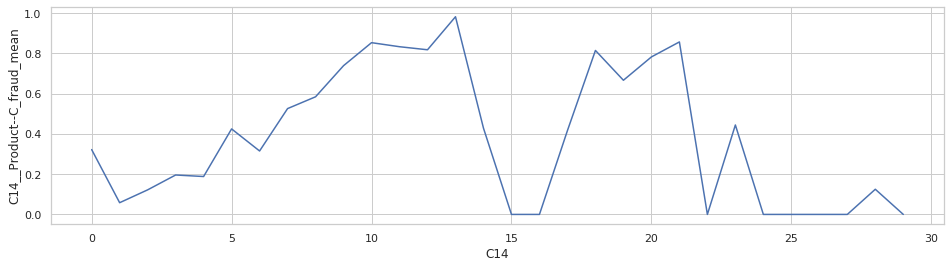

C14__Product--C_cnt


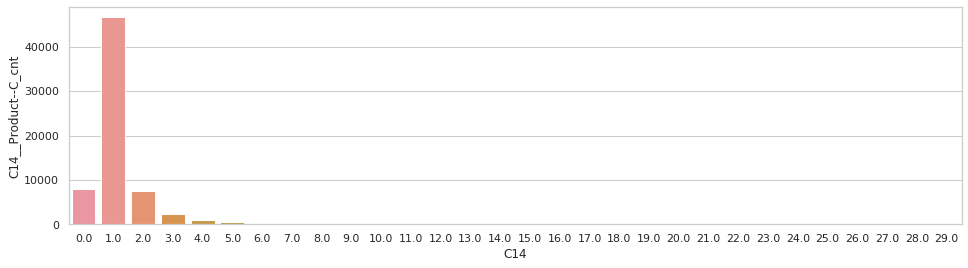

C14__Product--S_fraud_mean


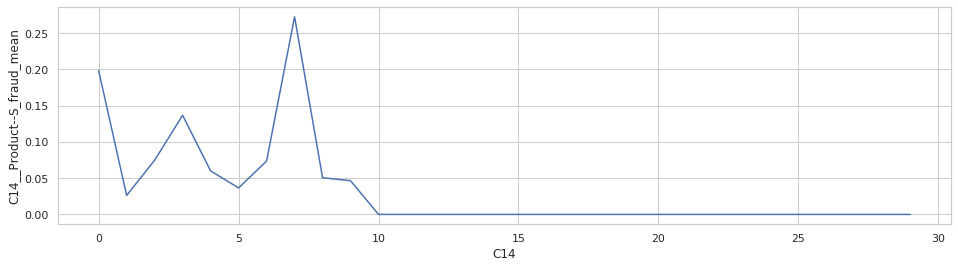

C14__Product--S_cnt


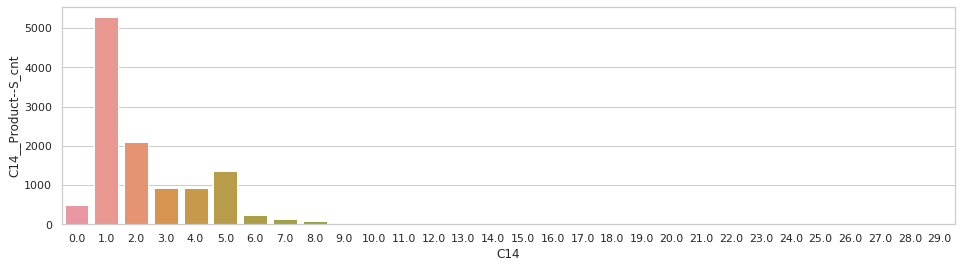

C14__Product--H_fraud_mean


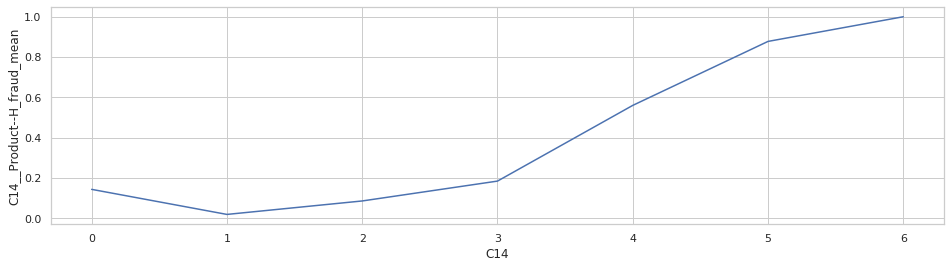

C14__Product--H_cnt


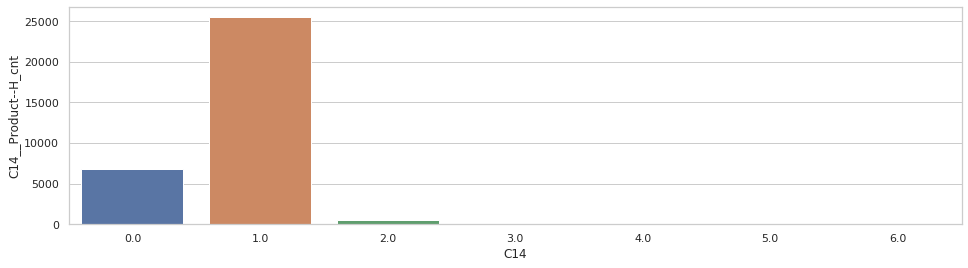

C14__Product--R_fraud_mean


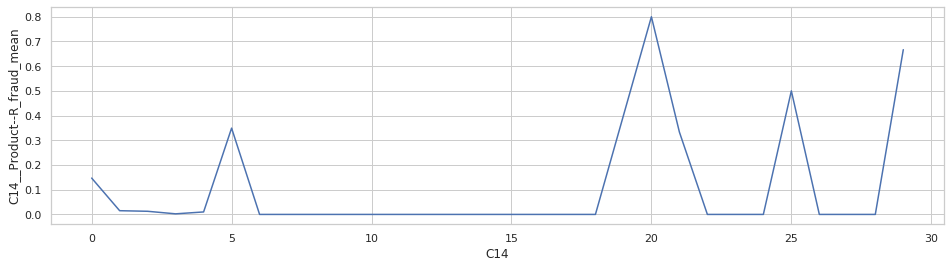

C14__Product--R_cnt


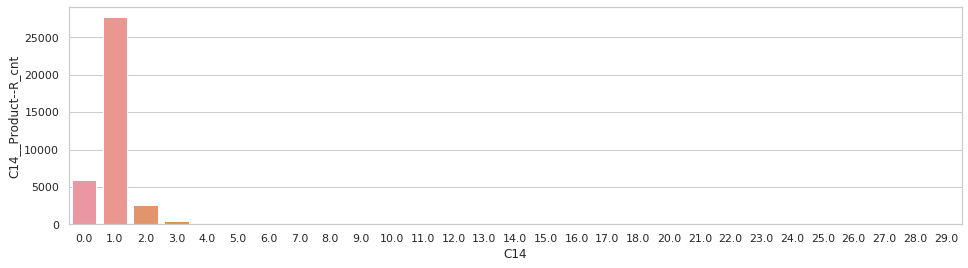

In [21]:
pd.set_option('max_rows', 300)
list_product = ['W', 'C', 'S', 'H', 'R']
df_product_C = pd.DataFrame(index=np.arange(50))

sns.set()
sns.set_style('whitegrid')

col = cols_C[0]
for col in cols_C:
    for product in list_product:
        tmp = train_df[train_df['ProductCD']==product]
        tmp = tmp[tmp[col]<30]
        col_mean = f'{col}__Product--{product}_fraud_mean'
        col_cnt = f'{col}__Product--{product}_cnt'
        tmp_mean = tmp.groupby(col)[COLUMN_TARGET].mean().to_frame(col_mean)
        tmp_cnt = tmp.groupby(col)[COLUMN_TARGET].count().to_frame(col_cnt)
        df_product_C = df_product_C.join(tmp_mean).join(tmp_cnt)
        tmp_mean.reset_index(inplace=True)
        tmp_cnt.reset_index(inplace=True)
    
        print(col_mean)
        plt.figure(figsize=(16,4))
        sns.lineplot(data=tmp_mean, x=col, y=col_mean)
        plt.show()
        print(col_cnt)
        plt.figure(figsize=(16,4))
        sns.barplot(data=tmp_cnt, x=col, y=col_cnt)
        plt.show() 

In [22]:
df_product_C

,C1__Product--W_fraud_mean,C1__Product--W_cnt,C1__Product--C_fraud_mean,C1__Product--C_cnt,C1__Product--S_fraud_mean,C1__Product--S_cnt,C1__Product--H_fraud_mean,C1__Product--H_cnt,C1__Product--R_fraud_mean,C1__Product--R_cnt,...,C14__Product--W_fraud_mean,C14__Product--W_cnt,C14__Product--C_fraud_mean,C14__Product--C_cnt,C14__Product--S_fraud_mean,C14__Product--S_cnt,C14__Product--H_fraud_mean,C14__Product--H_cnt,C14__Product--R_fraud_mean,C14__Product--R_cnt
0,0.428571,7.0,0.356846,482.0,NaN,NaN,NaN,NaN,1.000000,5.0,...,0.047758,14699.0,0.322226,7923.0,0.198397,499.0,0.143212,6836.0,0.147078,5990.0
1,0.022484,207967.0,0.042279,43757.0,0.015658,5173.0,0.023365,29274.0,0.012573,30620.0,...,0.022551,215070.0,0.058197,46652.0,0.026141,5279.0,0.018830,25491.0,0.015056,27697.0
2,0.019173,85222.0,0.079879,10879.0,0.082064,2035.0,0.109805,2723.0,0.050570,4212.0,...,0.017866,81214.0,0.122023,7433.0,0.074748,2087.0,0.085616,584.0,0.012673,2525.0
3,0.017256,44853.0,0.148555,3911.0,0.131604,1041.0,0.353293,501.0,0.170466,1009.0,...,0.015391,40869.0,0.195867,2226.0,0.136761,914.0,0.184211,38.0,0.002358,424.0
4,0.019815,25435.0,0.205099,1765.0,0.057014,1105.0,0.682081,173.0,0.337875,367.0,...,0.021965,23355.0,0.188332,977.0,0.060021,933.0,0.560000,25.0,0.010000,100.0
5,0.025721,15163.0,0.334875,1081.0,0.019272,1401.0,0.815789,114.0,0.607362,163.0,...,0.009018,13750.0,0.424883,426.0,0.036576,1367.0,0.877551,49.0,0.349206,63.0
6,0.016955,9496.0,0.437931,580.0,0.123494,332.0,0.869565,46.0,0.628319,113.0,...,0.017923,7923.0,0.315245,387.0,0.073593,231.0,1.000000,1.0,0.000000,21.0
7,0.018006,6498.0,0.397260,511.0,0.167832,143.0,0.781250,32.0,0.683544,79.0,...,0.011760,4762.0,0.525862,116.0,0.272727,143.0,NaN,NaN,0.000000,9.0
8,0.020476,4542.0,0.426966,356.0,0.166667,84.0,0.923077,26.0,0.828125,64.0,...,0.024638,3247.0,0.584507,142.0,0.050633,79.0,NaN,NaN,0.000000,3.0
9,0.015289,3205.0,0.594771,306.0,0.224490,49.0,0.823529,17.0,0.942857,35.0,...,0.027586,2465.0,0.739130,138.0,0.046512,43.0,NaN,NaN,0.000000,5.0
